# 📖**Projet 9 Produisez une étude de marché avec Python**

**Le contexte du projet de data analyse**

<br>▶ L'entreprise française d’agroalimentaire, La poule qui chante 🐔, souhaite se développer à l'international. Notre mission d’analyse est de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. 

▶ On ultilise des données de la FAO(Food and Agriculture Organization)  et des données open source avec les critères de l’analyse PEST.

▶ Pour la partie analyse, on ultilise les méthodes CAH(classification ascendante hiérarchique), k-means pour la classification et également réaliser une ACP afin de visualiser les résultats.

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward, linkage, fcluster
from scipy.cluster.vq import kmeans, vq
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
import pylab
import geoplot
import geopandas
import plotly.express as px

In [ ]:
# L'importation des données
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P9/df.csv', index_col = 'Zone')
df = df_org.drop(['Index'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  171 non-null    float64
 1   Disponibilité alimentaire   171 non-null    float64
 2   Disponibilité de protéines  171 non-null    float64
 3   PIB par habitant            171 non-null    float64
 4   Importations                171 non-null    float64
 5   Exportations                171 non-null    float64
 6   Prix poulet                 171 non-null    float64
 7   Political_Stability         171 non-null    float64
 8   Distance km                 171 non-null    float64
dtypes: float64(9)
memory usage: 13.4+ KB


# Jeux de données

## Analyse PEST 
<br> **P (Politique): Political_Stability
<br> E (Economique): PIB par habitant(USD), Prix poulet(1kg/USD)
<br> S (Socioculturel): Population(mille personnes)
<br> T (Technologique): Distance km
<br> Autres: 
       <br> Disponibilité alimentaire (Kcal/personne/jour), 
       <br> Disponibilité de protéines en quantité (g/personne/jour),
       <br> Importations - Quantité(Milliers de tonnes), 
       <br> Exportations - Quantité(Milliers de tonnes)**

In [ ]:
df.head()

Population  Disponibilité alimentaire  \
Zone                                                         
Afghanistan           36296.113                        5.0   
Albania                2884.169                       85.0   
Algeria               41389.189                       22.0   
Angola                29816.766                       35.0   
Antigua and Barbuda      95.426                      233.0   

                     Disponibilité de protéines  PIB par habitant  \
Zone                                                                
Afghanistan                                0.54        520.616409   
Albania                                    6.26       4514.204908   
Algeria                                    1.97       4109.696001   
Angola                                     3.60       4095.811686   
Antigua and Barbuda                       17.77      15383.415188   

                     Importations  Exportations  Prix poulet  \
Zone                                                           
Afghanistan                  29.0           0.0     6.225301   
Albania                      38.0           0.0     4.570000   
Algeria                       2.0           0.0     3.690000   
Angola                      277.0           0.0     6.225301   
Antigua and Barbuda           7.0           0.0     6.225301   

                     Political_Stability  Distance km  
Zone                                                   
Afghanistan                        -2.80       5573.0  
Albania                             0.38       1546.0  
Algeria                            -0.92       2024.0  
Angola                             -0.33       6575.0  
Antigua and Barbuda                 0.75       6659.0

In [ ]:
df.describe()

Population  Disponibilité alimentaire  Disponibilité de protéines  \
count  1.710000e+02                 171.000000                  171.000000   
mean   4.295384e+04                  74.257310                    7.098538   
std    1.535062e+05                  60.620162                    5.611954   
min    5.204500e+01                   0.000000                    0.040000   
25%    2.864792e+03                  22.000000                    2.100000   
50%    9.729823e+03                  63.000000                    6.490000   
75%    3.046071e+04                 104.500000                   10.220000   
max    1.421022e+06                 243.000000                   27.870000   

       PIB par habitant  Importations  Exportations  Prix poulet  \
count        171.000000    171.000000    171.000000   171.000000   
mean       14044.182114     88.064327    104.309942     6.225301   
std        19406.167804    186.286880    459.352361     2.346227   
min          450.900697      0.000000      0.000000     2.140000   
25%         1996.009198      3.000000      0.000000     5.435000   
50%         6101.130428     16.000000      0.000000     6.225301   
75%        16766.189308     78.500000     12.000000     6.225301   
max       111017.182246   1069.000000   4223.000000    25.370000   

       Political_Stability   Distance km  
count           171.000000    171.000000  
mean             -0.052892   5931.802721  
std               0.878800   3674.051032  
min              -2.940000    465.000000  
25%              -0.575000   3289.500000  
50%              -0.040000   5931.802721  
75%               0.645000   7756.500000  
max               1.590000  19179.000000

In [ ]:
df.shape

(171, 9)

# Normalizer

In [ ]:
# Centrage et réduction
std_scale = preprocessing.StandardScaler().fit(df)
df_scaled = std_scale.transform(df)

In [ ]:
df_scaled.shape

(171, 9)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Population',
                     'Disponibilité alimentaire',
                     'Disponibilité de protéines',
                     'PIB par habitant',
                     'Importations',
                     'Exportations',
                     'Prix poulet',
                     'Political_Stability',
                     'Distance km']
df_scaled.describe()

Population  Disponibilité alimentaire  Disponibilité de protéines  \
count  1.710000e+02               1.710000e+02                1.710000e+02   
mean   2.077610e-17               9.349247e-17                1.142686e-16   
std    1.002937e+00               1.002937e+00                1.002937e+00   
min   -2.803001e-01              -1.228558e+00               -1.261462e+00   
25%   -2.619230e-01              -8.645768e-01               -8.933106e-01   
50%   -2.170701e-01              -1.862478e-01               -1.087545e-01   
75%   -8.162427e-02               5.003535e-01                5.578501e-01   
max    9.003646e+00               2.791782e+00                3.712159e+00   

       PIB par habitant  Importations  Exportations   Prix poulet  \
count      1.710000e+02  1.710000e+02  1.710000e+02  1.710000e+02   
mean       5.194026e-17  5.194026e-18  1.298506e-18 -1.584178e-16   
std        1.002937e+00  1.002937e+00  1.002937e+00  1.002937e+00   
min       -7.025191e-01 -4.741234e-01 -2.277474e-01 -1.746336e+00   
25%       -6.226658e-01 -4.579719e-01 -2.277474e-01 -3.378285e-01   
50%       -4.105076e-01 -3.879821e-01 -2.277474e-01  0.000000e+00   
75%        1.406770e-01 -5.149271e-02 -2.015469e-01  0.000000e+00   
max        5.011695e+00  5.281191e+00  8.992631e+00  8.183747e+00   

       Political_Stability   Distance km  
count         1.710000e+02  1.710000e+02  
mean         -7.791039e-18  1.714029e-16  
std           1.002937e+00  1.002937e+00  
min          -3.294933e+00 -1.492319e+00  
25%          -5.958600e-01 -7.212918e-01  
50%           1.471259e-02  2.482725e-16  
75%           7.964738e-01  4.981031e-01  
max           1.874962e+00  3.616200e+00

**Distribution avant normalisation**

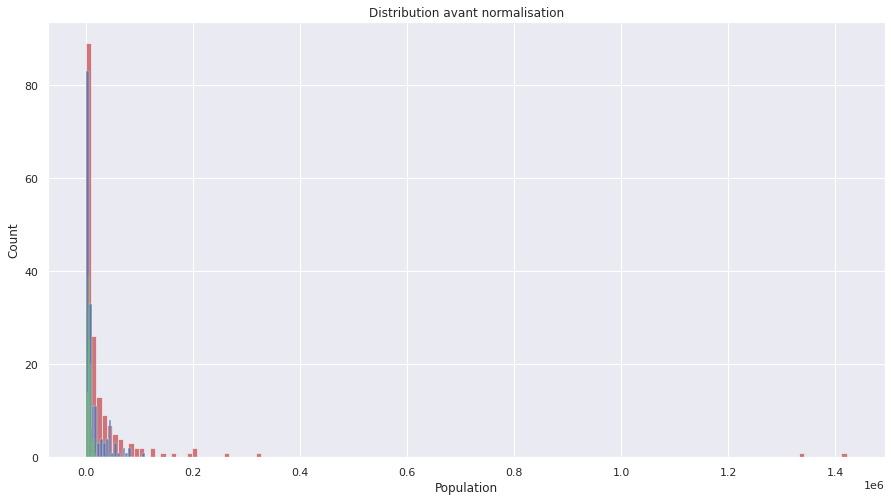

In [ ]:
# Distribution avant normalisation pour 'Population', 'PIB par habitant' et 'Distance km'
sns.histplot(df['Population'], color='r').set(title='Distribution avant normalisation')
sns.histplot(df['PIB par habitant'], color='b', label = 'PIB par habitant')
sns.histplot(df['Distance km'], color='g')

**Distribution après normalisation**

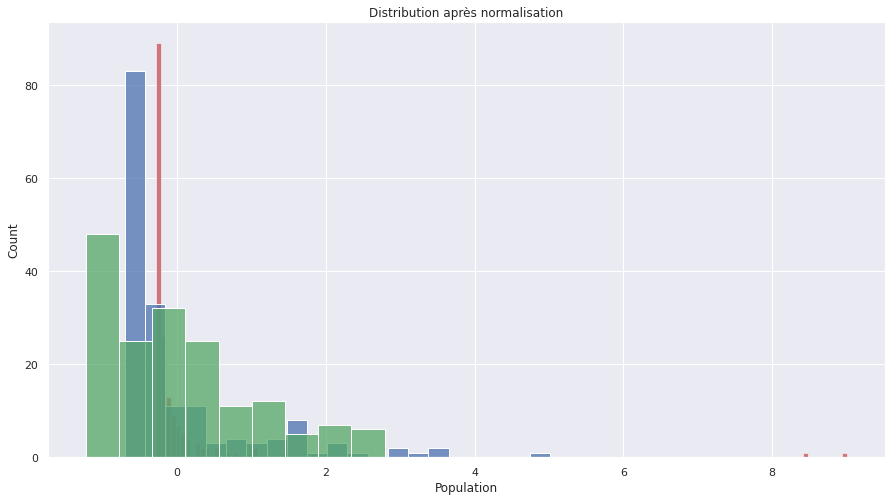

In [ ]:
# Distribution après normalisation pour 'Population', 'PIB par habitant' et 'Distance km'
sns.histplot(df_scaled['Population'], color='r').set(title='Distribution après normalisation')
sns.histplot(df_scaled['PIB par habitant'], color='b')
sns.histplot(df_scaled['Disponibilité alimentaire'], color='g')

# La classification ascendante hiérarchique (CAH) et le dendrogramme

## 3 méthodes de classification ascendante hiérarchique avec dendrogrammes

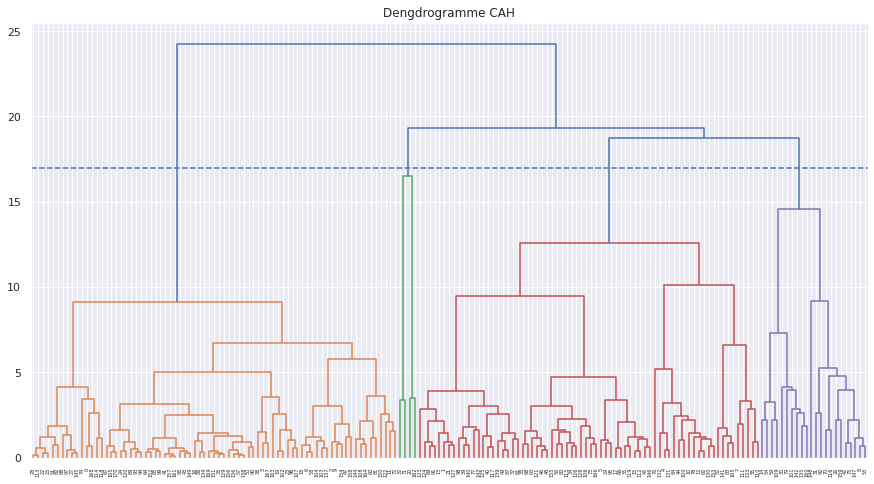

In [ ]:
# Créer dendrogamme pour CAH
cah_ward = linkage(df_scaled, method = 'ward', metric='euclidean')
dn_ward = dendrogram (cah_ward)
plt.axhline(linestyle='--', y=17) 
plt.title('Dengdrogramme CAH')
plt.show()

<b> Choisir 4 comme le nombre de clusters

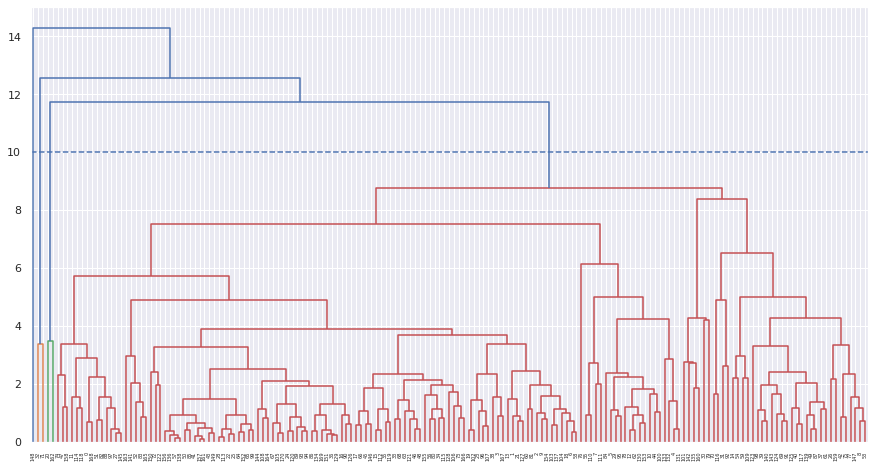

In [ ]:
# Changer l'autre méthode comme 'complete'
cah_complete = linkage(df_scaled, method = 'complete', metric='euclidean')
dn_complete = dendrogram (cah_complete)
plt.axhline(linestyle='--', y=10) 
plt.show()

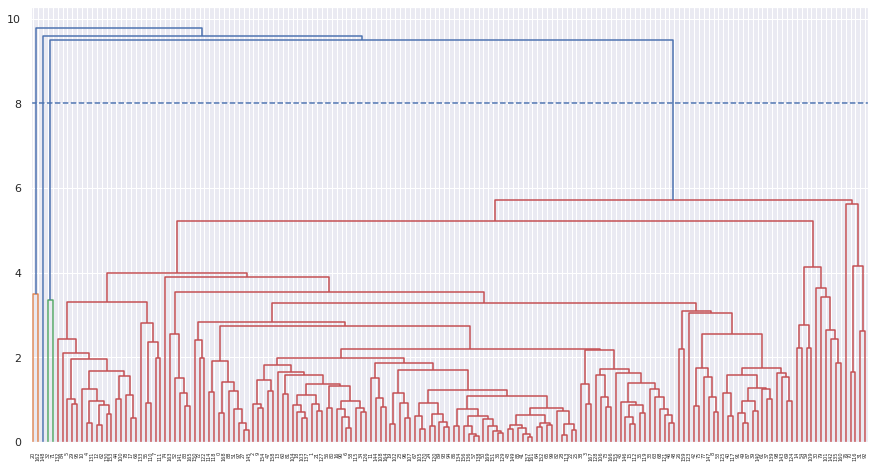

In [ ]:
# Changer l'autre méthode comme 'average'
cah_avg = linkage(df_scaled, method = 'average', metric='euclidean')
dn_avg = dendrogram (cah_avg)
plt.axhline(linestyle='--', y=8) 
plt.show()

## Ajourter des étiquette

In [ ]:
# Etiquettes pour 4 clusters par méthode CAH
cah_label = fcluster(cah_ward, 4, criterion='maxclust')

## Visualisation de classification avec scatterplot et boxplot

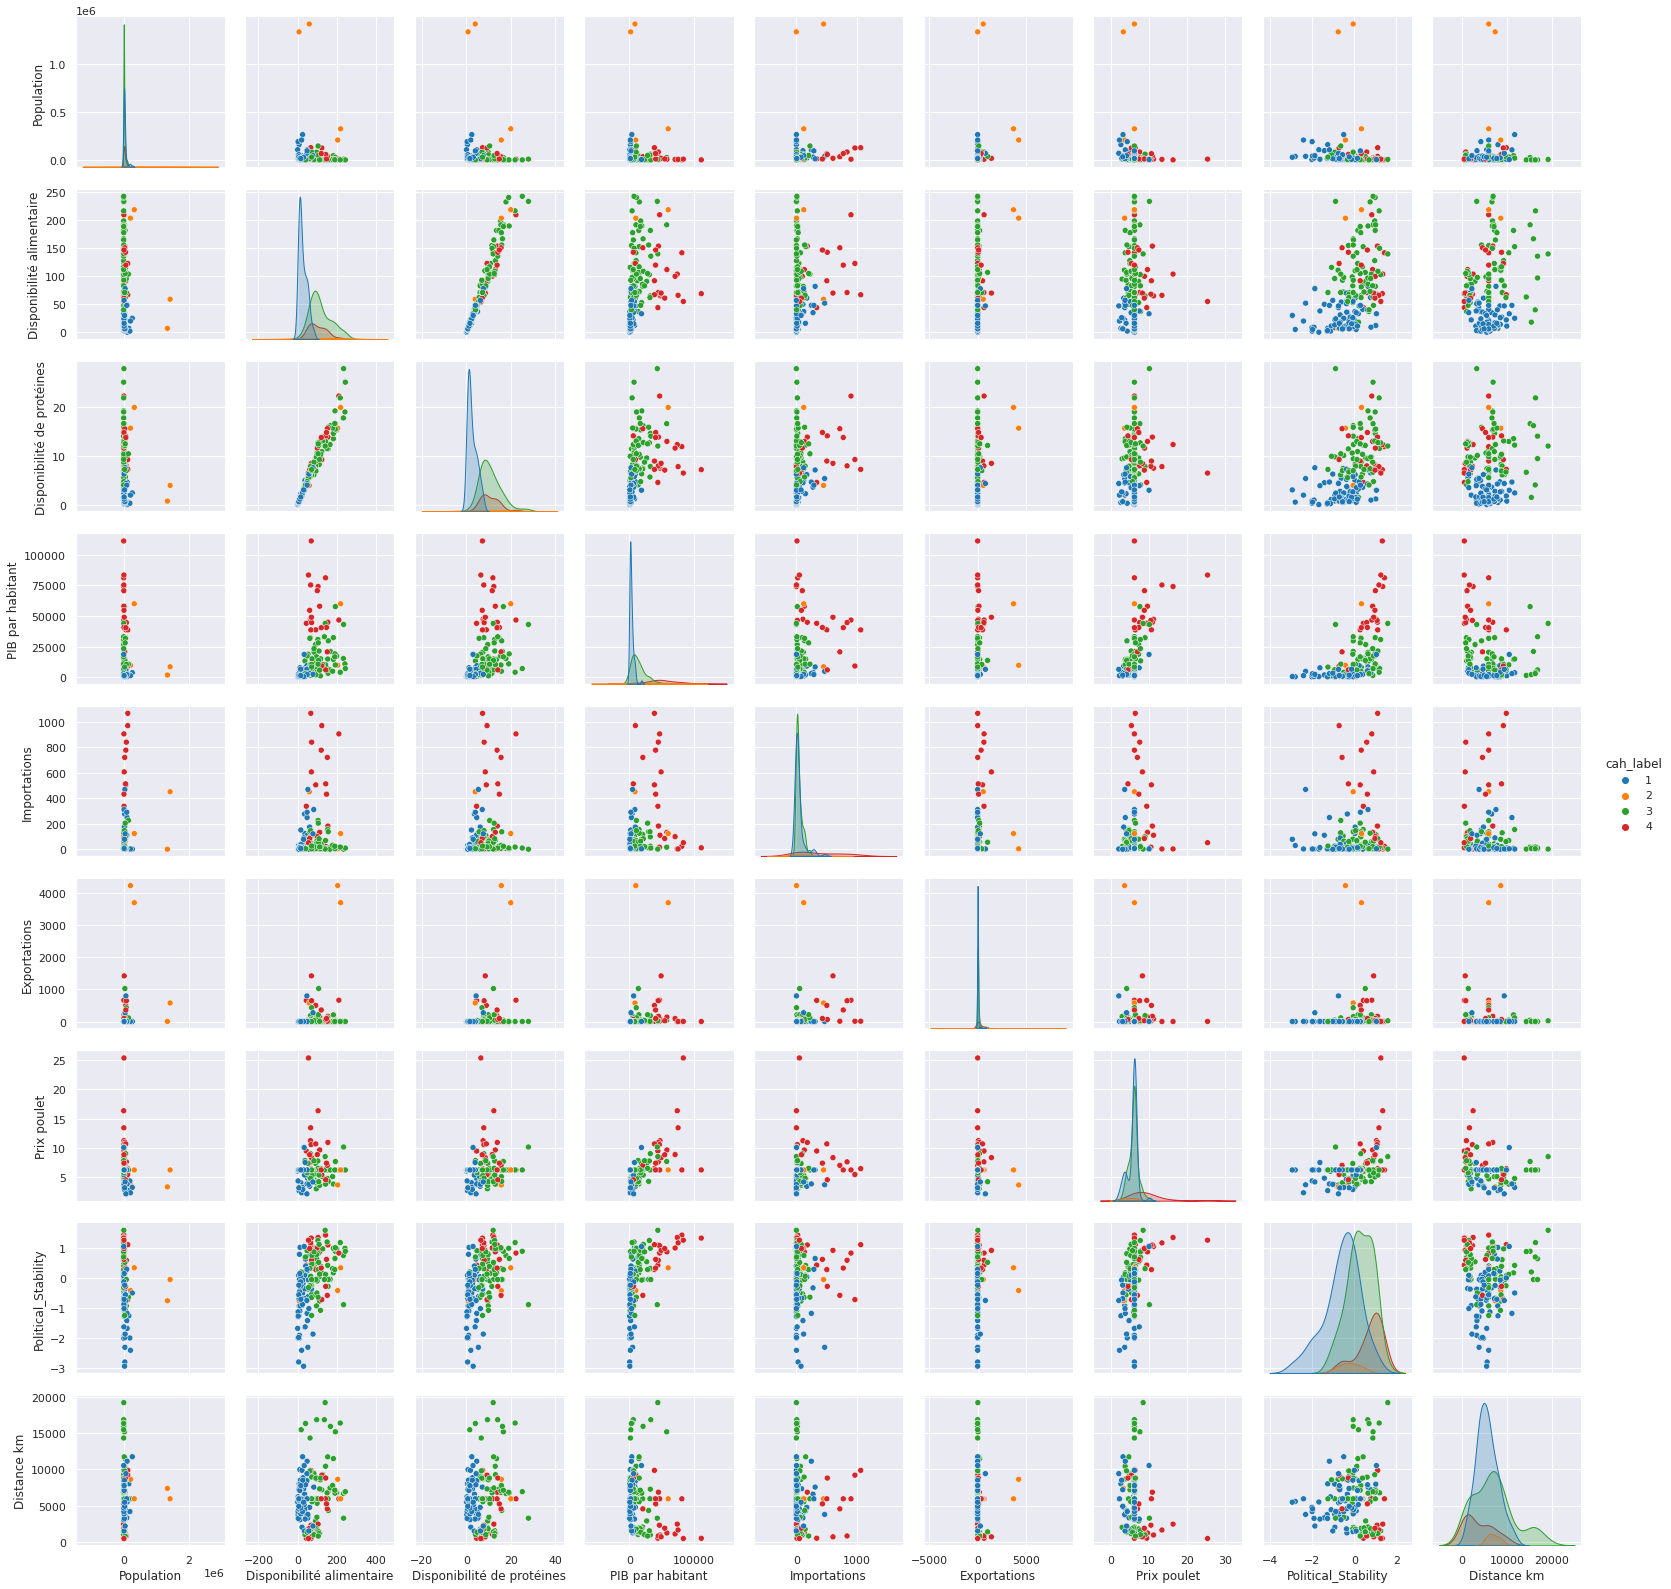

In [ ]:
# Vérifier les 4 groupes avec pairplot
df['cah_label'] = cah_label # Ajouter les résultats de CAH dans df
sns.pairplot(df, hue= 'cah_label', vars = ['Population',
                   'Disponibilité alimentaire',
                   'Disponibilité de protéines',
                   'PIB par habitant',
                   'Importations',
                   'Exportations',
                   'Prix poulet',
                   'Political_Stability',
                   'Distance km'], palette='tab10')

In [ ]:
df.head()

Population  Disponibilité alimentaire  \
Zone                                                         
Afghanistan           36296.113                        5.0   
Albania                2884.169                       85.0   
Algeria               41389.189                       22.0   
Angola                29816.766                       35.0   
Antigua and Barbuda      95.426                      233.0   

                     Disponibilité de protéines  PIB par habitant  \
Zone                                                                
Afghanistan                                0.54        520.616409   
Albania                                    6.26       4514.204908   
Algeria                                    1.97       4109.696001   
Angola                                     3.60       4095.811686   
Antigua and Barbuda                       17.77      15383.415188   

                     Importations  Exportations  Prix poulet  \
Zone                                                           
Afghanistan                  29.0           0.0     6.225301   
Albania                      38.0           0.0     4.570000   
Algeria                       2.0           0.0     3.690000   
Angola                      277.0           0.0     6.225301   
Antigua and Barbuda           7.0           0.0     6.225301   

                     Political_Stability  Distance km  cah_label  
Zone                                                              
Afghanistan                        -2.80       5573.0          1  
Albania                             0.38       1546.0          3  
Algeria                            -0.92       2024.0          1  
Angola                             -0.33       6575.0          1  
Antigua and Barbuda                 0.75       6659.0          3

In [ ]:
# Fixer la taille de graphique
sns.set(rc = {'figure.figsize':(20,15)})

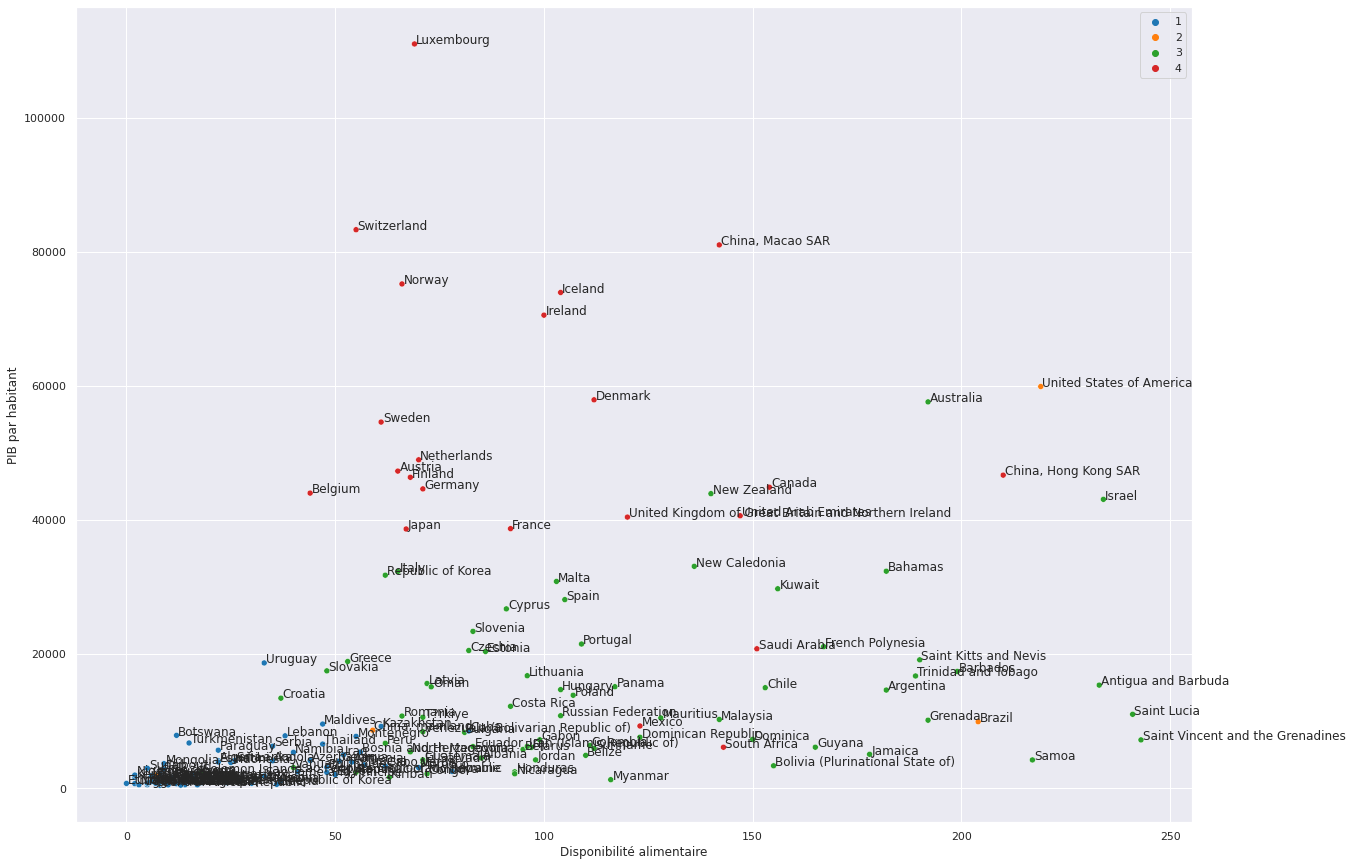

In [ ]:
# Vérifier les 4 groupes pour variables 'Disponibilité alimentaire' et 'PIB par habitant'
x = df['Disponibilité alimentaire']
y = df['PIB par habitant']
n = df.index

sns.scatterplot(x=x, y=y, hue= cah_label, data = df, palette='tab10')

for i, txt in enumerate(n):
    plt.text(x[i]+0.4, y[i]+0.3, txt)
    
plt.show()

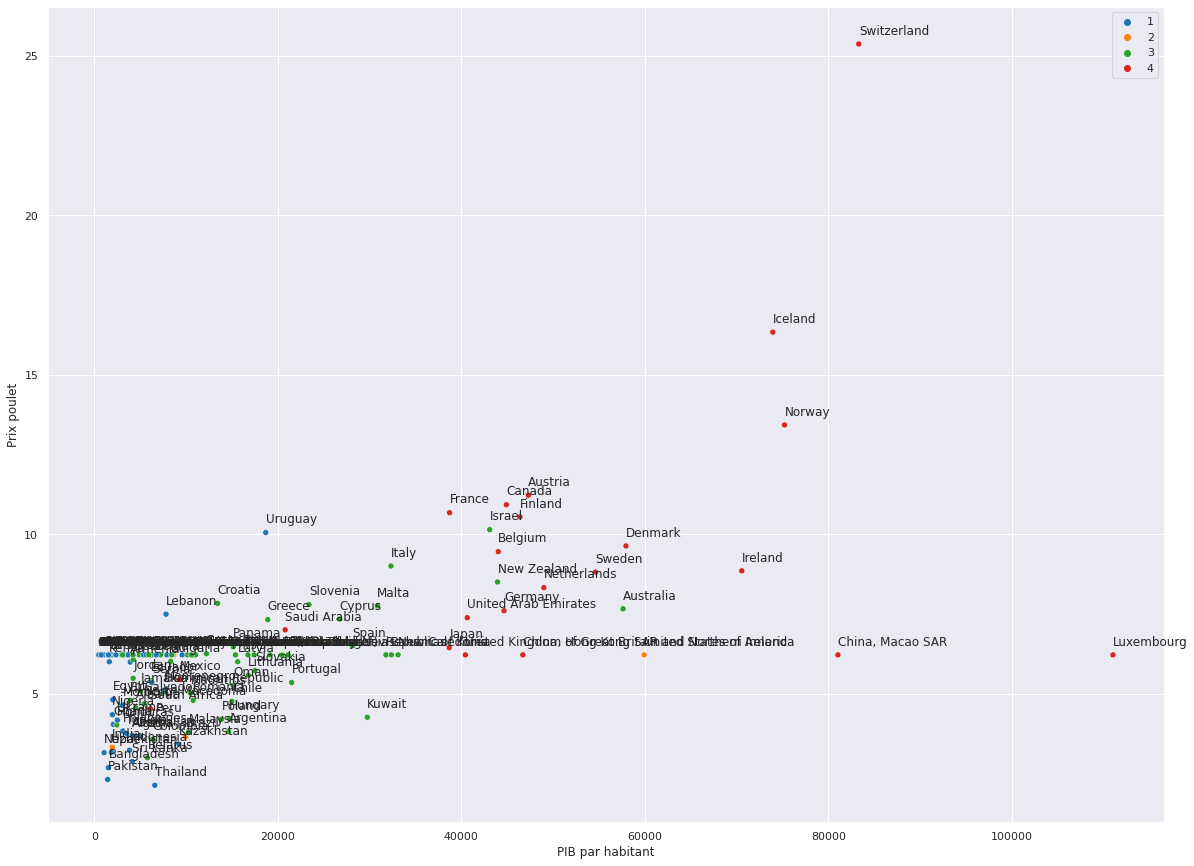

In [ ]:
# Vérifier les 4 groupes pour variables 'PIB par habitant' et 'Prix poulet'
x = df['PIB par habitant']
y = df['Prix poulet']
n = df.index

sns.scatterplot(x=x, y=y, hue= cah_label, data = df, palette='tab10')

# Ajouter les noms de pays
for i, txt in enumerate(n):
    plt.text(x[i]+0.4, y[i]+0.3, txt)
    
plt.show()

In [ ]:
# Changer la taille de graphique
sns.set(rc = {'figure.figsize':(15,8)})

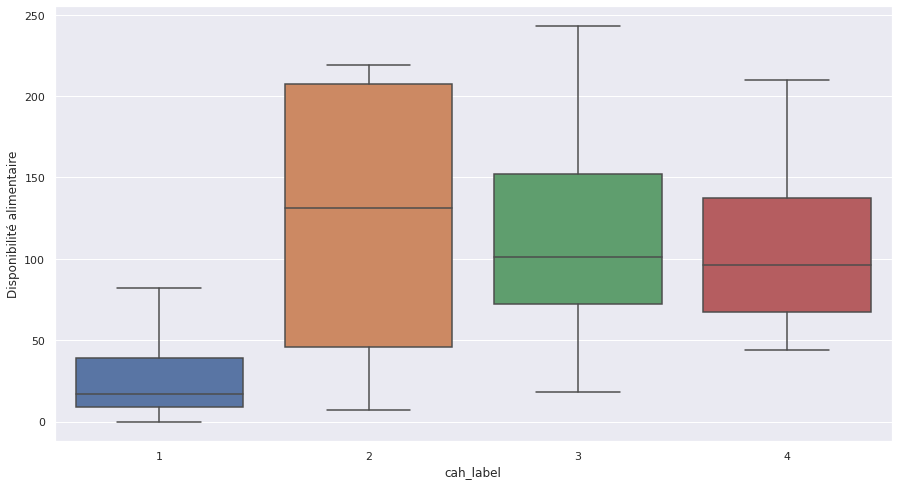

In [ ]:
# Vérifier les 4 groupes avec boxplot
sns.boxplot(x='cah_label', y='Disponibilité alimentaire', 
                data = df)

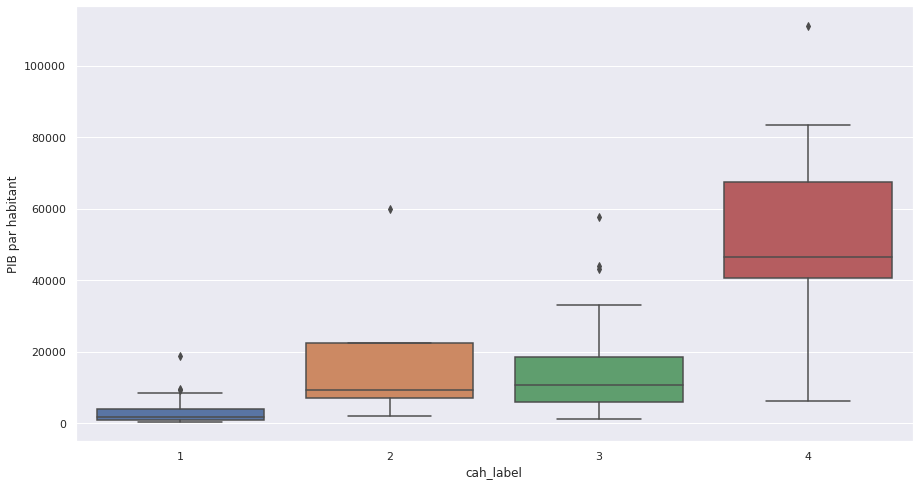

In [ ]:
# Vérifier les 4 groupes avec boxplot
sns.boxplot(x='cah_label', y='PIB par habitant', 
                data = df)

## Interprétation des 4 groupes

In [ ]:
# Vérifier les moyennes des variables des 4 groupes
print(df[['Population',
                   'Disponibilité alimentaire',
                   'Disponibilité de protéines',
                   'PIB par habitant',
                   'Importations',
                   'Exportations',
                   'Prix poulet',
                   'Political_Stability',
                   'Distance km']].groupby(cah_label).mean())

      Population  Disponibilité alimentaire  Disponibilité de protéines  \
1   31153.555533                  25.360000                    2.524000   
2  823154.288750                 122.250000                   10.080000   
3   14676.637429                 115.328571                   10.723714   
4   31300.400773                 101.545455                   10.616818   

   PIB par habitant  Importations  Exportations  Prix poulet  \
1       2935.756963     40.626667     15.120000     5.617738   
2      20118.466955    144.500000   2123.750000     4.860151   
3      13936.487873     43.300000     46.657143     5.953776   
4      51152.061379    381.954545    224.636364     9.408691   

   Political_Stability  Distance km  
1            -0.582705  5540.112290  
2            -0.223223  6964.401361  
3             0.277162  6975.614674  
4             0.734091  3758.145949  


In [ ]:
# Compter les nombres de pays pour chaque cluster
df_group_cah = df.groupby(by = 'cah_label').count()[['Population']]
df_group_cah = df_group_cah.rename(columns = {'Population':'Nombre de pays'})
df_group_cah = df_group_cah.reset_index()
df_group_cah.cah_label = df_group_cah.cah_label.astype(str)
df_group_cah

cah_label  Nombre de pays
0         1              75
1         2               4
2         3              70
3         4              22

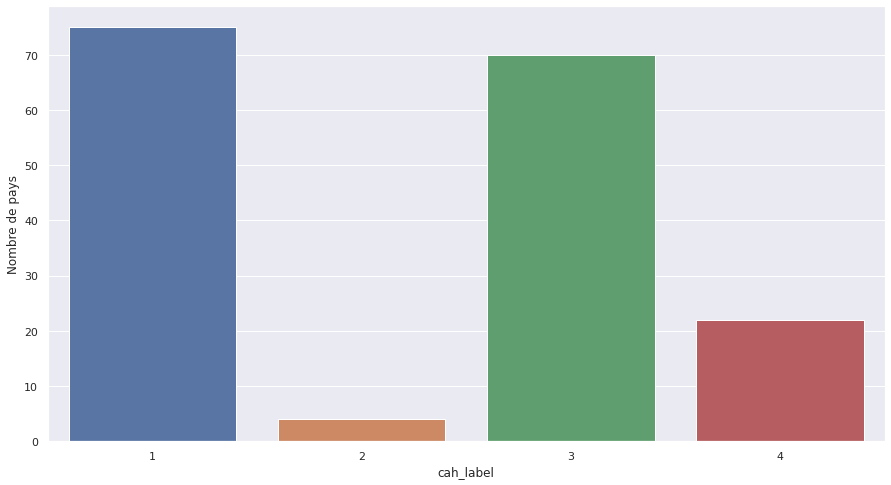

In [ ]:
# Compter les nombres de pays pour chaque cluster
sns.barplot(data = df_group_cah, x = 'cah_label', y = 'Nombre de pays')

### Groupe1: Pays sous-développé
<b> Les pays avec la moindre de population, PIB est en bas, stabilité politique est unstable. Il y a le moindre de disponibilité alimentaire et le moindre de disponibilité de protéines.

In [ ]:
group1_cah = df.loc[df['cah_label'] == 1, :]
group1_cah.index

Index(['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bosnia and Herzegovina', 'Botswana',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'C?te d'Ivoire', 'Cuba',
       'Democratic People's Republic of Korea', 'Djibouti', 'Egypt',
       'Eswatini', 'Ethiopia', 'Gambia', 'Georgia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya',
       'Kyrgyzstan', 'Lao People's Democratic Republic', 'Lebanon', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritania',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Paraguay', 'Philippines', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Serbia', 'Sierra Leone',
       'Sri Lanka', 'Sudan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo',
       'Tunisia', 'Turkmenistan', 'Uganda', 'Ukraine',
       

### Groupe2: Grands pays
<b> Les 4 grands pays avec beaucoup de population, ils sont très différents des autres. 

In [ ]:
group2_cah = df.loc[df['cah_label'] == 2, :]
group2_cah.index

Index(['Brazil', 'China, mainland', 'India', 'United States of America'], dtype='object', name='Zone')

### Groupe3: Les pays moyennes
<b> Ils sont les pays avec situation 'moyenne' pour tous les variable. Ils sont moyenne pour la disponibilité alimentaire, PIB par habitant, exportation, importation, stabilité politique, etc.

In [ ]:
group3_cah = df.loc[df['cah_label'] == 3, :]
group3_cah.index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Bahamas',
       'Barbados', 'Belarus', 'Belize', 'Bolivia (Plurinational State of)',
       'Bulgaria', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'French Polynesia', 'Gabon', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Hungary',
       'Iran (Islamic Republic of)', 'Israel', 'Italy', 'Jamaica', 'Jordan',
       'Kiribati', 'Kuwait', 'Latvia', 'Lithuania', 'Malaysia', 'Malta',
       'Mauritius', 'Myanmar', 'New Caledonia', 'New Zealand', 'Nicaragua',
       'North Macedonia', 'Oman', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Spain', 'Suriname', '

### Groupe4: Les pays/région riches
<b> Ils sont les pays riches, bien développés avec PIB par habitant les plus hautes, les prix de poulet les plus haute. Ils sont les pays/regions les plus proches avec stabilité politique stable.

In [ ]:
group4_cah = df.loc[df['cah_label'] == 4, :]
group4_cah.index

Index(['Austria', 'Belgium', 'Canada', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Denmark', 'Finland', 'France', 'Germany',
       'Iceland', 'Ireland', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'Norway', 'Saudi Arabia', 'South Africa', 'Sweden', 'Switzerland',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype='object', name='Zone')

## CAH avec sklearn

In [ ]:
# Recalculer CAH avec la librairie sklearn
CAH_clustering = AgglomerativeClustering(n_clusters = 4)
label_CAH_sk = CAH_clustering.fit_predict(df_scaled)

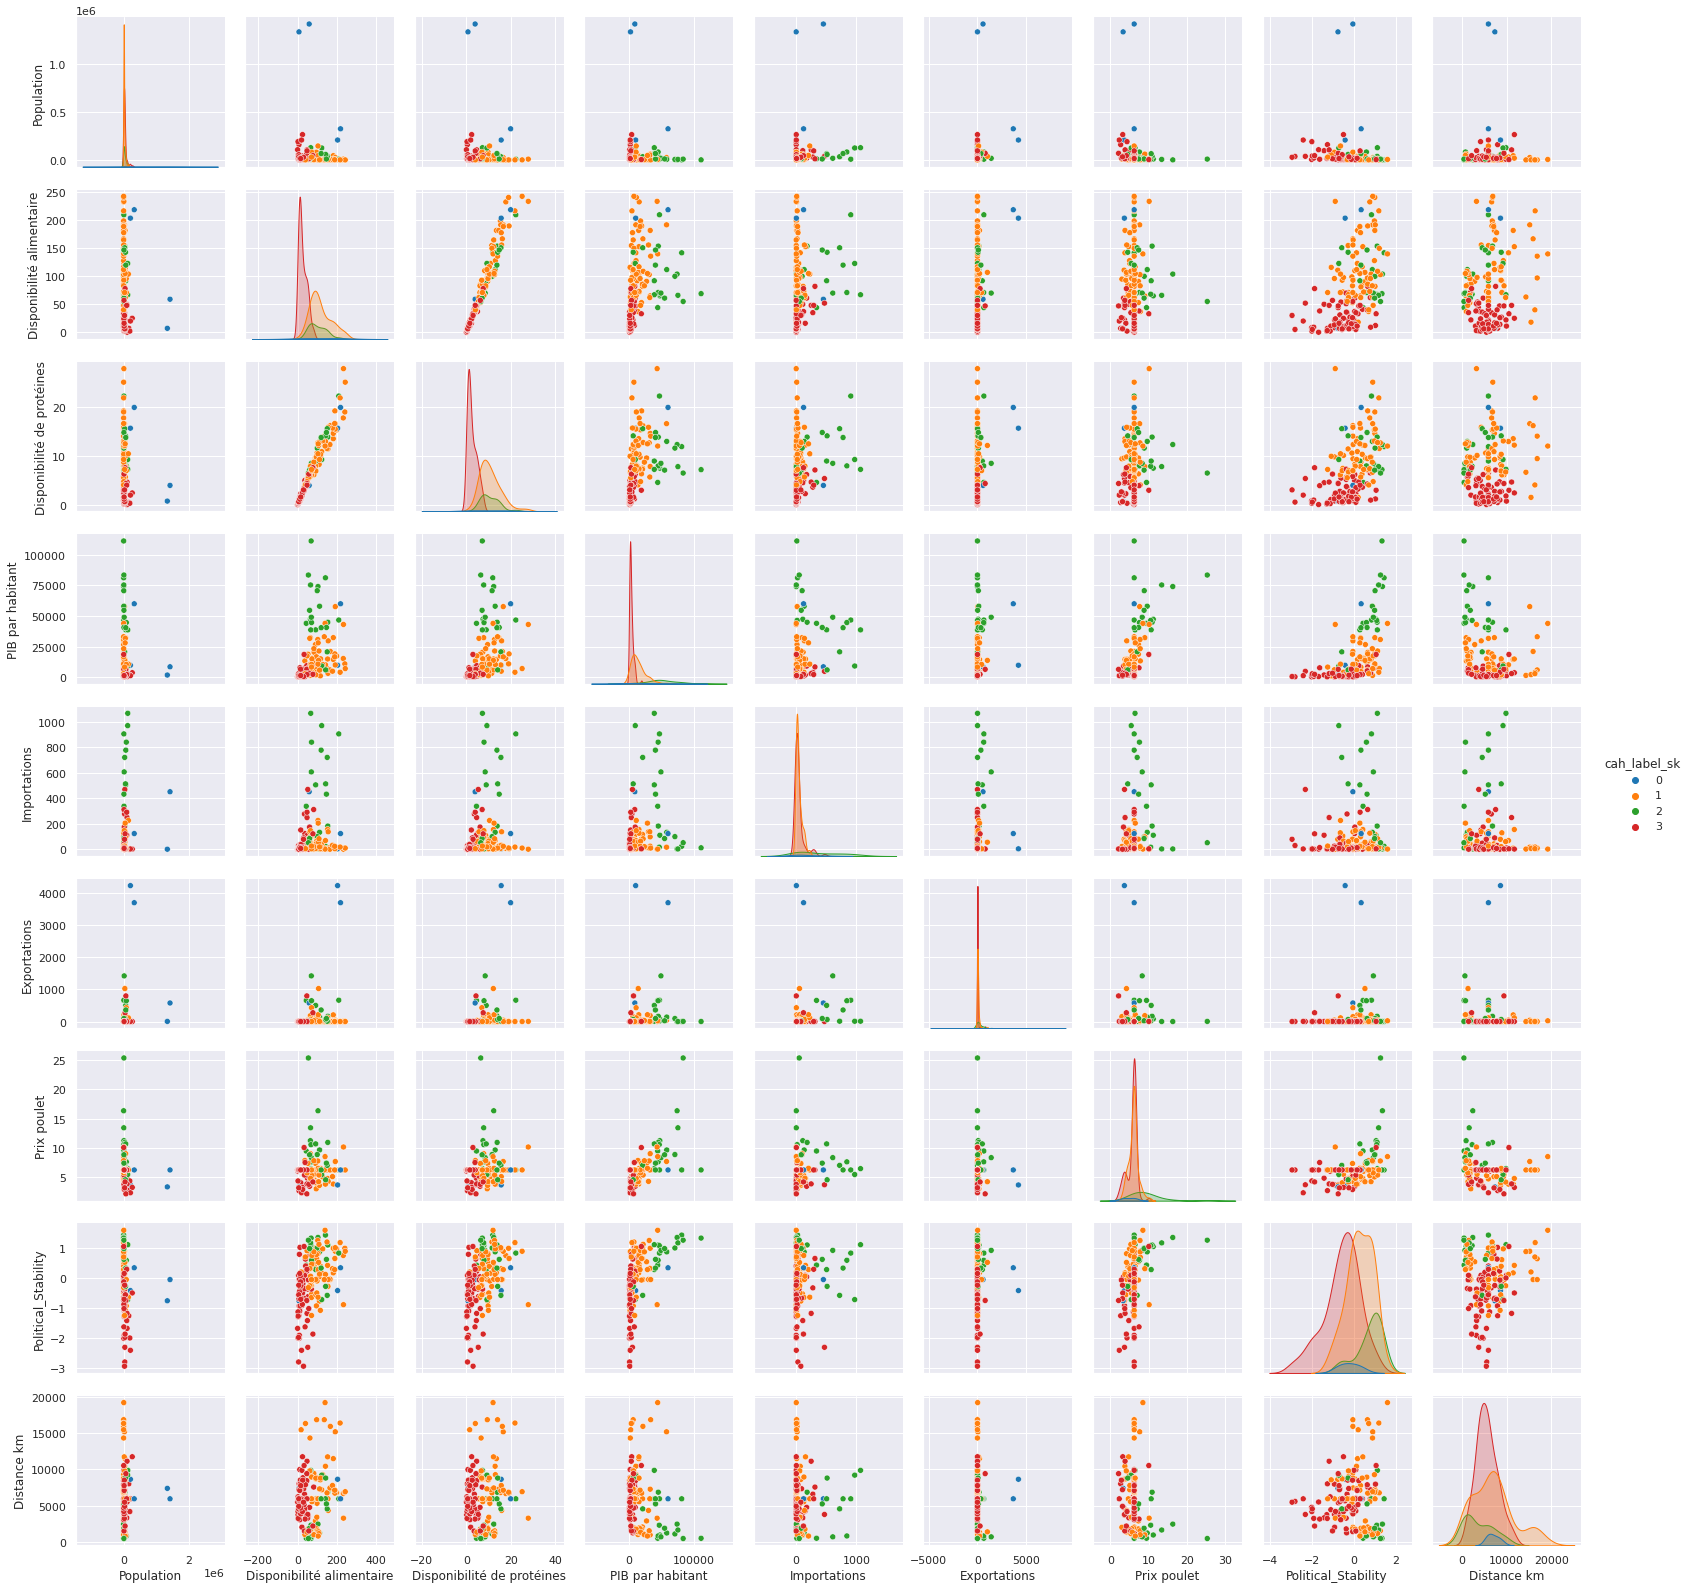

In [ ]:
# Ajouter les étiquettes dans df et vérifier les résultats
df['cah_label_sk'] = label_CAH_sk
sns.pairplot(df, hue= 'cah_label_sk', vars = ['Population',
                   'Disponibilité alimentaire',
                   'Disponibilité de protéines',
                   'PIB par habitant',
                   'Importations',
                   'Exportations',
                   'Prix poulet',
                   'Political_Stability',
                   'Distance km'], palette='tab10')

In [ ]:
# Compter les nombres de pays pour chaque cluster
df_group_cah_sk = df.groupby(by = 'cah_label_sk').count()[['Population']]
df_group_cah_sk = df_group_cah_sk.rename(columns = {'Population':'Nombre de pays'})
df_group_cah_sk = df_group_cah_sk.reset_index()
df_group_cah_sk.cah_label_sk = df_group_cah_sk.cah_label_sk.astype(str)
df_group_cah_sk

cah_label_sk  Nombre de pays
0            0               4
1            1              70
2            2              22
3            3              75

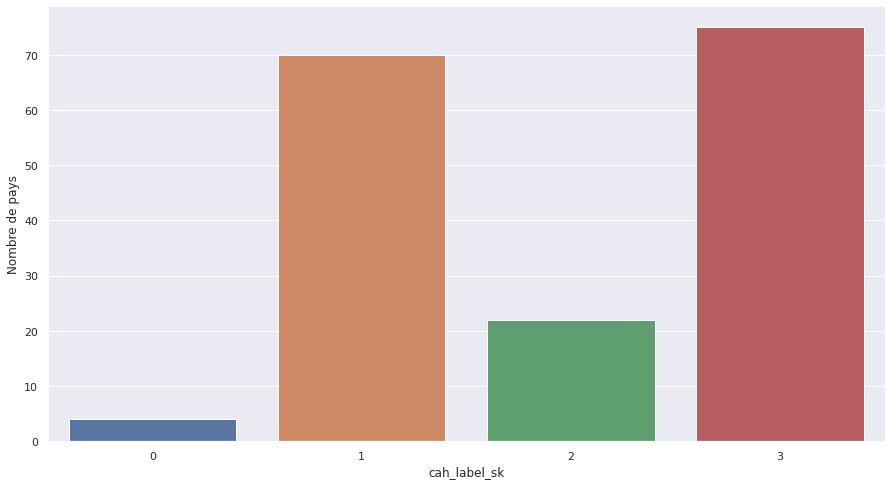

In [ ]:
# Compter les nombres de pays pour chaque cluster
sns.barplot(data = df_group_cah_sk, x = 'cah_label_sk', y = 'Nombre de pays')

**Les résultats sont similaires avec la librairie de Scipy**

# KMeans

##La méthode Elbow



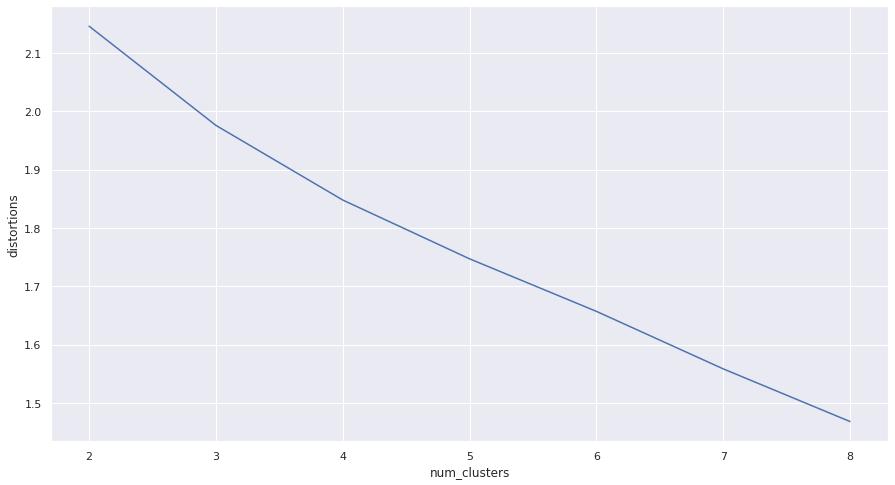

In [ ]:
# Nombre de cluster
distortions = []
num_clusters = [2, 3, 4, 5, 6, 7, 8]

# Calculer distortions pour les nombres des clusters différents
for i in num_clusters:
    centroids, distortion = kmeans(df_scaled, i)
    distortions.append(distortion)

# Créer le graphique de la méthode Elbow
elow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
                               'distortions': distortions})

sns.lineplot(x= 'num_clusters', y = 'distortions', data = elow_plot_data)
plt.show()

**On ne peut pas juger combien de groupes qu'on doit choisir par cette méthode.**

## Silhouette analyse

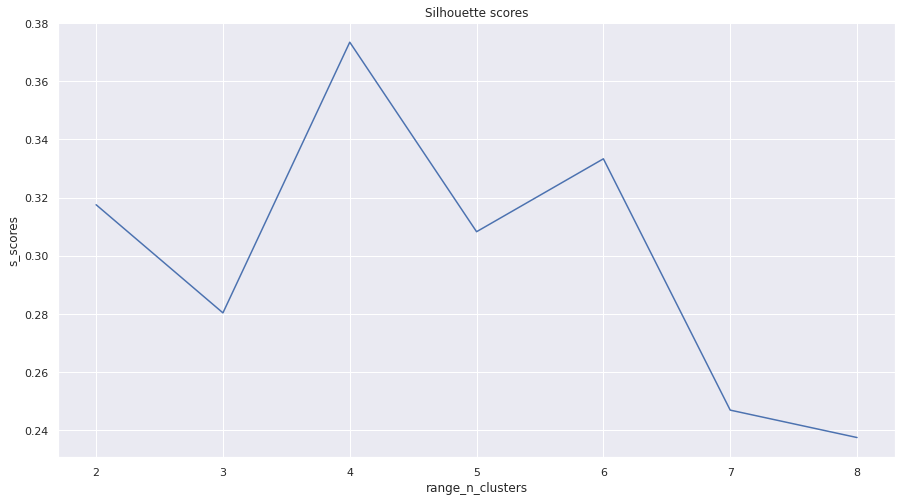

In [ ]:
# Nombre de cluster
s_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Calculer silhouette score avec kmeans
for num_clusters in range_n_clusters:
    
    kmeans_sk = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans_sk.fit(df_scaled)
    s_scores.append (silhouette_score(df_scaled, kmeans_sk.labels_))
df_score = pd.DataFrame({'range_n_clusters': range_n_clusters,
             's_scores': s_scores})

sns.lineplot(x= 'range_n_clusters', y = 's_scores', data = df_score)
plt.title('Silhouette scores')
plt.show()

**Choisir 4 comme le nombre de clusters**

## Ajourter des étiquettes

In [ ]:
# Faire le kmeans
kmeans_cluster3_centers, _ = kmeans(df_scaled, 4)
cluster_kmeans3, _ = vq(df_scaled, kmeans_cluster3_centers)

## Présenter les centroids

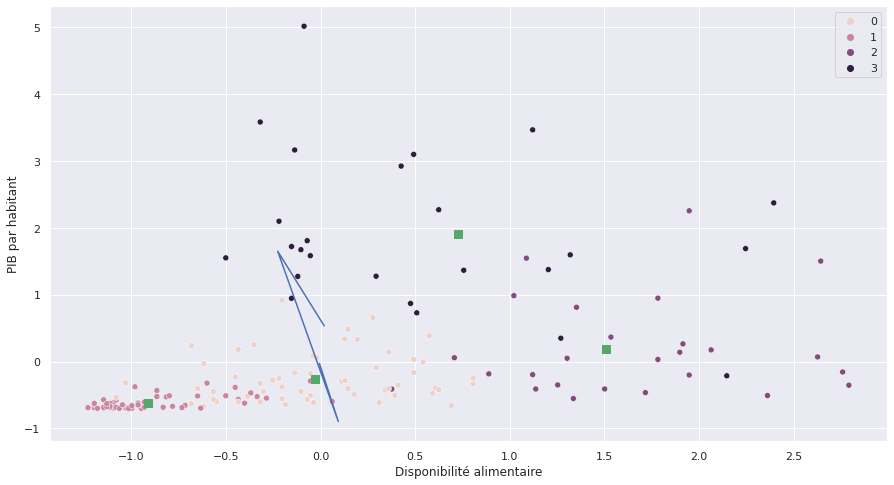

In [ ]:
# Présenter les centroids et les clusters avec 'Disponibilité alimentaire' et 'PIB par habitant'
sns.scatterplot( x = 'Disponibilité alimentaire', y = 'PIB par habitant', hue = cluster_kmeans3, data = df_scaled)
plt.plot(kmeans_cluster3_centers[:,0], kmeans_cluster3_centers[:,1], kmeans_cluster3_centers[:,2], kmeans_cluster3_centers[:,3], 'sg',markersize = 8)
plt.show()

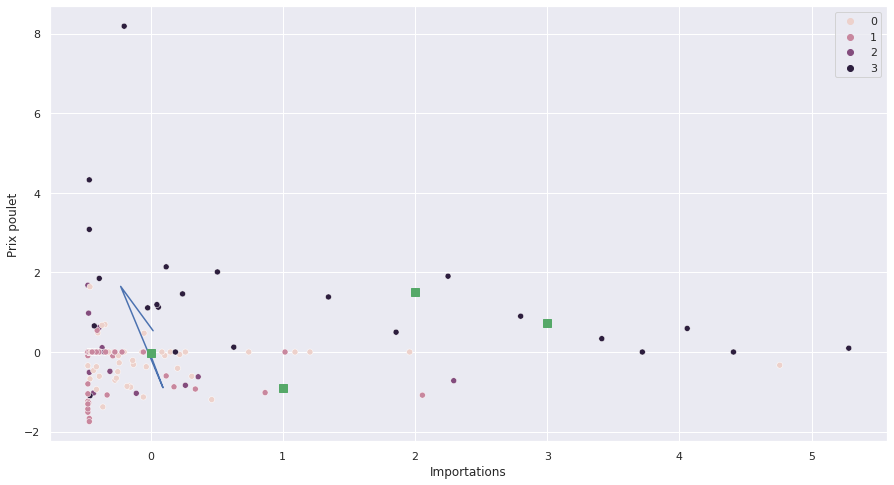

In [ ]:
# Présenter les centroids et les clusters avec 'Importations' et 'Prix poulet'
sns.scatterplot( x = 'Importations', y = 'Prix poulet', hue = cluster_kmeans3, data = df_scaled)
plt.plot(kmeans_cluster3_centers[:,0], kmeans_cluster3_centers[:,1], kmeans_cluster3_centers[:,2], 'sg',markersize = 8)
plt.show()

## Verification et visualisation de classification avec scatterplot et boxplot

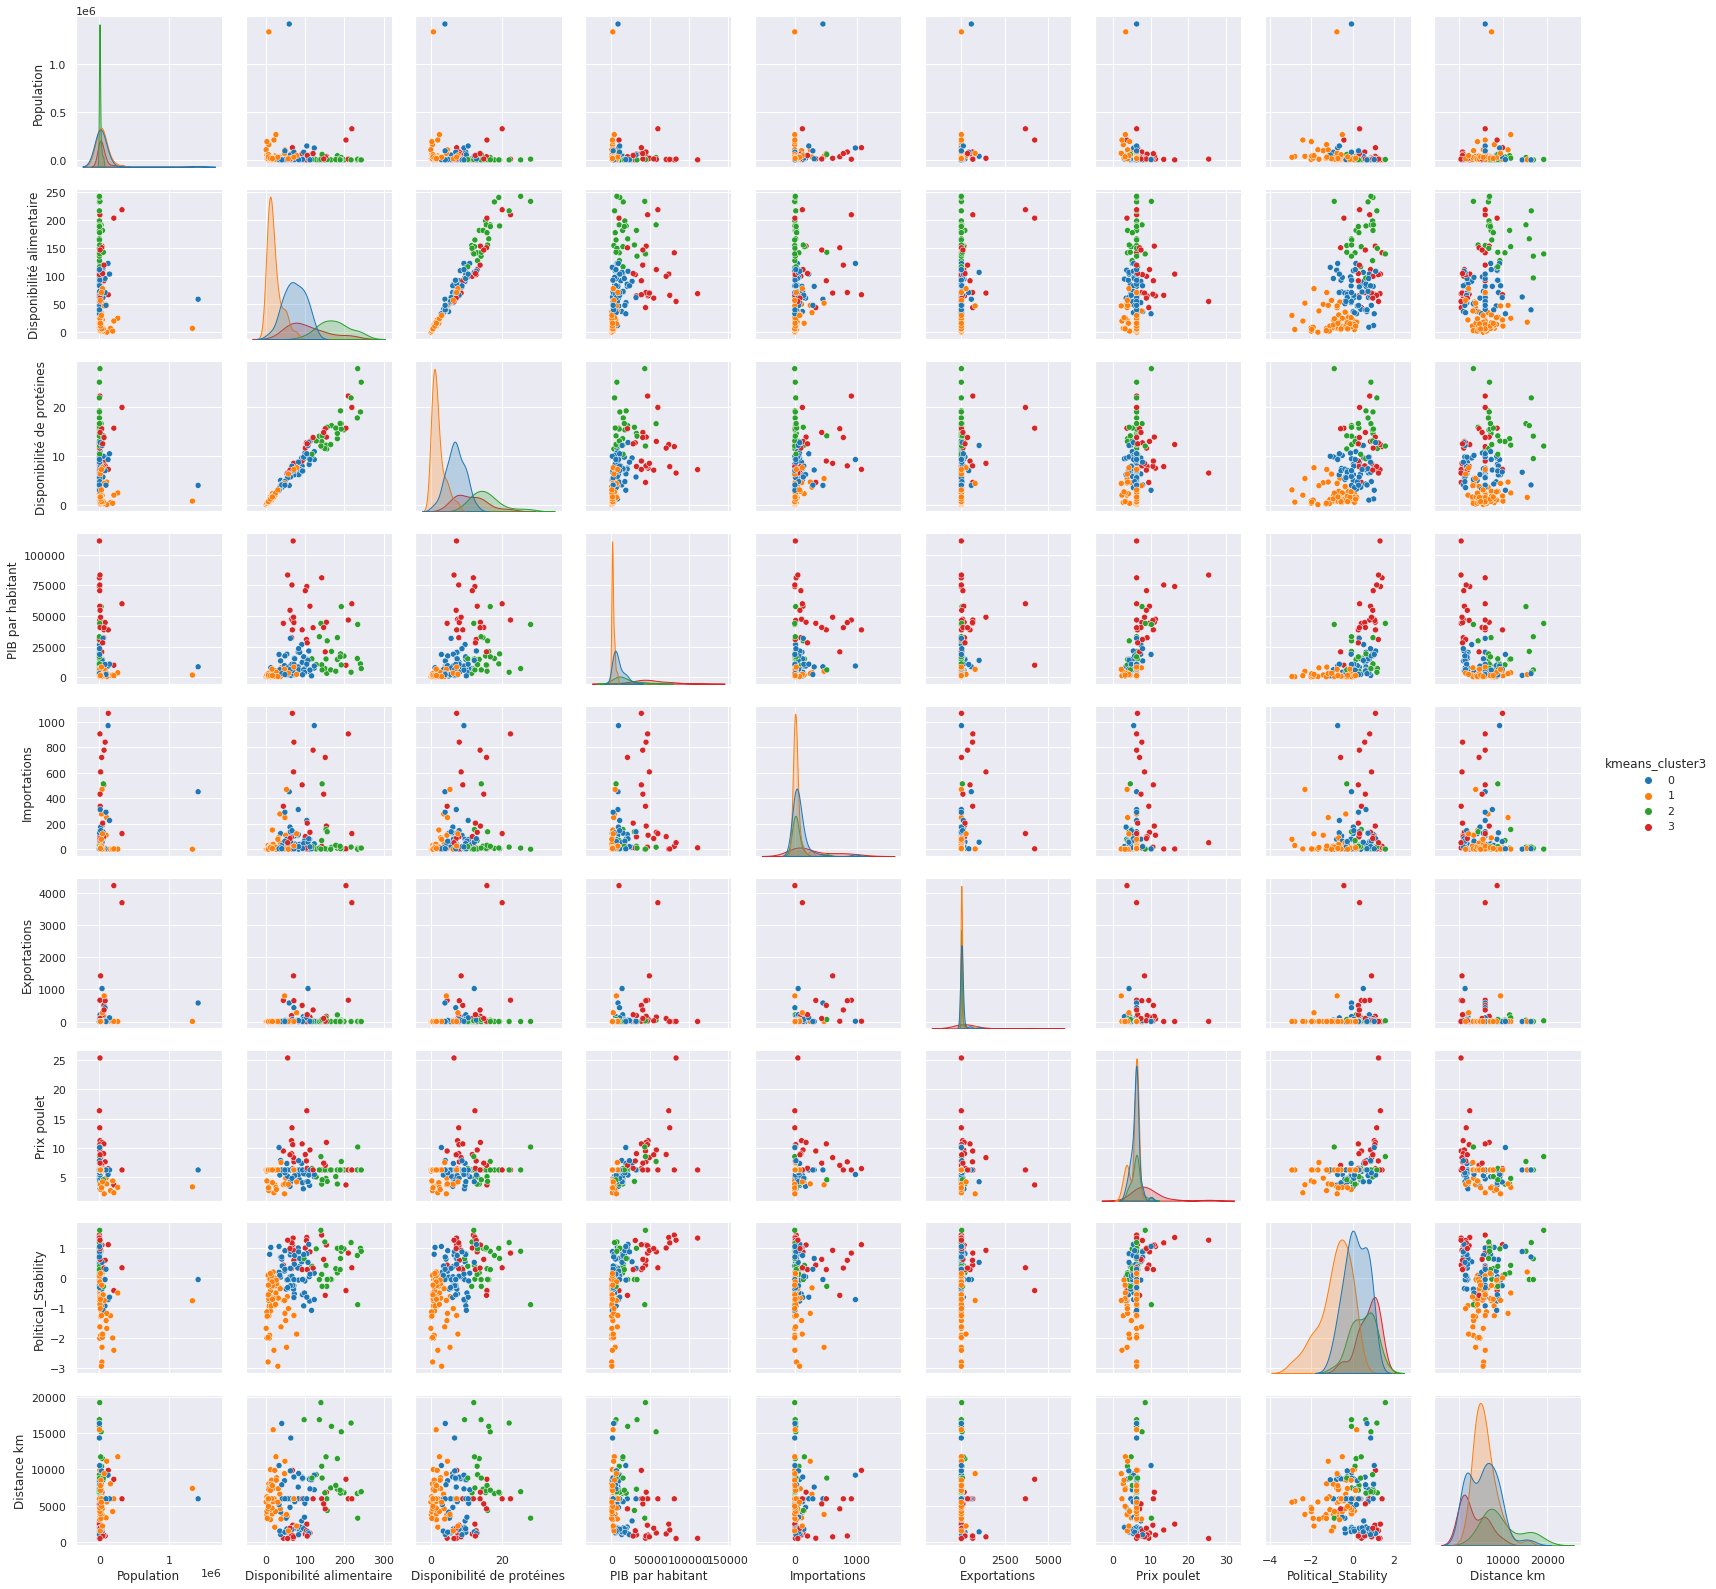

In [ ]:
# Vérifier les 4 groupes avec pairplot
df['kmeans_cluster3'] = cluster_kmeans3
sns.pairplot(df, hue= 'kmeans_cluster3', vars = ['Population',
                   'Disponibilité alimentaire',
                   'Disponibilité de protéines',
                   'PIB par habitant',
                   'Importations',
                   'Exportations',
                   'Prix poulet',
                   'Political_Stability',
                   'Distance km'], palette='tab10')

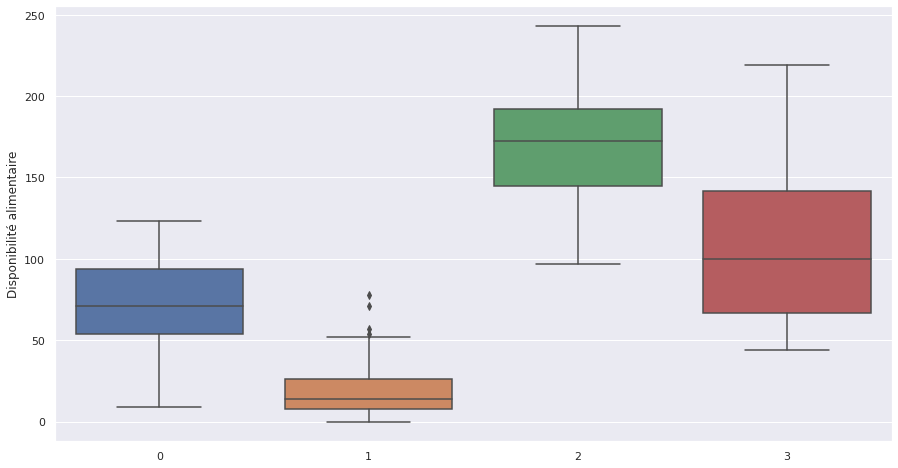

In [ ]:
sns.boxplot(x=cluster_kmeans3, y='Disponibilité alimentaire', 
                data = df)

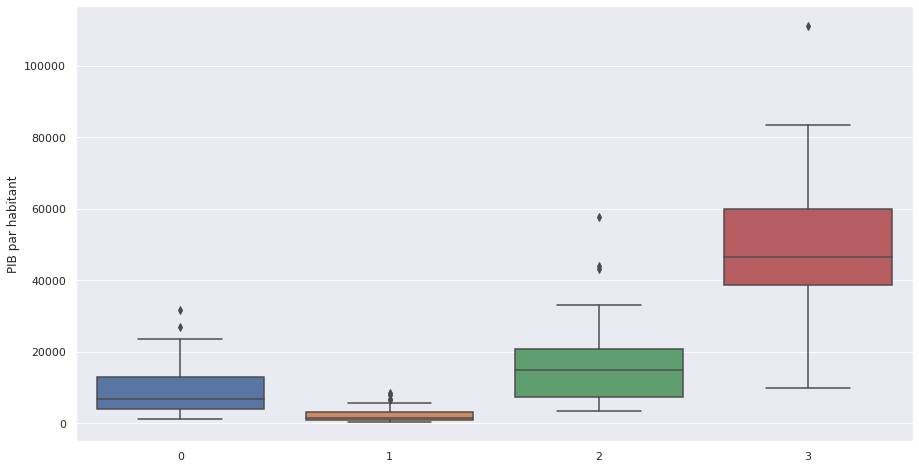

In [ ]:
sns.boxplot(x= cluster_kmeans3, y='PIB par habitant', 
                data = df)

## Interprétation de les 4 groupes

In [ ]:
# Vérifier les moyennes des variables des 4 groupes
print(df[['Population',
                   'Disponibilité alimentaire',
                   'Disponibilité de protéines',
                   'PIB par habitant',
                   'Importations',
                   'Exportations',
                   'Prix poulet',
                   'Political_Stability',
                   'Distance km']].groupby(cluster_kmeans3).mean())

     Population  Disponibilité alimentaire  Disponibilité de protéines  \
0  42078.888271                  72.661017                    6.933729   
1  57348.950869                  20.098361                    1.994918   
2   8333.364154                 173.884615                   15.549231   
3  45899.975120                 106.560000                   11.151600   

   PIB par habitant  Importations  Exportations  Prix poulet  \
0       9087.642814     77.881356     51.847458     5.814968   
1       2169.243776     33.163934     17.950820     5.471596   
2      17767.430626     41.807692     19.346154     6.058058   
3      50844.285956    294.160000    527.200000     9.206660   

   Political_Stability  Distance km  
0             0.166512  5534.163265  
1            -0.828572  5799.882235  
2             0.490931  9672.377028  
3             0.756400  3301.920544  


In [ ]:
# Compter les nombres de pays pour chaque cluster
df_group_kmeans = df.groupby(by = 'kmeans_cluster3').count()[['Population']]
df_group_kmeans = df_group_kmeans.rename(columns = {'Population':'Nombre de pays'})
df_group_kmeans = df_group_kmeans.reset_index()
df_group_kmeans

kmeans_cluster3  Nombre de pays
0                0              59
1                1              61
2                2              26
3                3              25

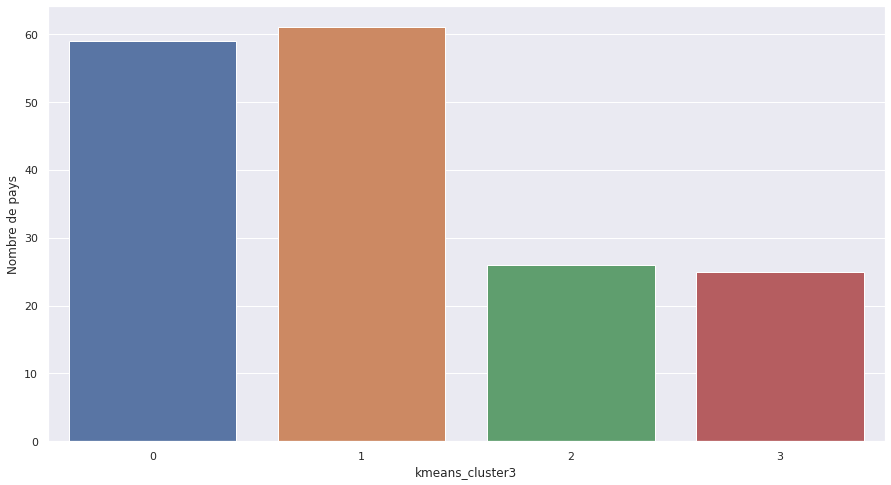

In [ ]:
# Compter les nombres de pays pour chaque cluster
sns.barplot(data = df_group_kmeans, x = 'kmeans_cluster3', y = 'Nombre de pays')

### Group Pays sous-développé
<br>Pour cette partie de pays; le PIB par habitant est en bas, stabilité politique est unstable. Il y a le moindre de disponibilité alimentaire et le moindre de disponibilité de protéines. Le prix de poulet est en bas mais la population est en haute.

### Group Puissance agricole
<br>Les pays avec disponibilité alimentaire et disponibilité de protéines en haute, ils exportent beaucoup de poulet aux autres pays. Ils ne sont pas notre cibles parce qu'il y a longs distances aussi.

### Group Les pays moyennes
<br>Ils sont les pays avec les moindre de population (pas grands pays). Ils sont moyenne pour la disponibilité alimentaire, PIB par habitant, exportation, importation, stabilité politique, etc.

### Group Les pays/région riches
<br>Ils sont les pays riches, bien développés avec PIB par habitant les plus hautes, les prix de poulet les plus haute. Ils sont les pays/regions les plus proches avec stabilité politique stable. La grande partie des pays sont en Euroupe. Il y a aussi les grandes avec beaucoup des populations et les grands marchés.

<br>**L'ordres des groups peut changer à cause de la récalculation.**

Les détails de chaque groupes

In [ ]:
# Les détails de chaque groupes
group0_km = df.loc[df['kmeans_cluster3'] == 0, :]
print("Group 0: " + group0_km.index)

group1_km = df.loc[df['kmeans_cluster3'] == 1, :]
print("Group 1: " + group1_km.index)

group2_km = df.loc[df['kmeans_cluster3'] == 2, :]
print("Group 2: " + group2_km.index)

group3_km = df.loc[df['kmeans_cluster3'] == 3, :]
print("Group 3: " + group3_km.index)

Index(['Group 0: Albania', 'Group 0: Belarus', 'Group 0: Belize',
       'Group 0: Benin', 'Group 0: Bosnia and Herzegovina',
       'Group 0: Botswana', 'Group 0: Bulgaria', 'Group 0: Cabo Verde',
       'Group 0: China, mainland', 'Group 0: Colombia', 'Group 0: Congo',
       'Group 0: Costa Rica', 'Group 0: Croatia', 'Group 0: Cuba',
       'Group 0: Cyprus', 'Group 0: Czechia', 'Group 0: Dominican Republic',
       'Group 0: Ecuador', 'Group 0: El Salvador', 'Group 0: Estonia',
       'Group 0: Gabon', 'Group 0: Georgia', 'Group 0: Greece',
       'Group 0: Guatemala', 'Group 0: Honduras', 'Group 0: Hungary',
       'Group 0: Iran (Islamic Republic of)', 'Group 0: Jordan',
       'Group 0: Kazakhstan', 'Group 0: Kiribati',
       'Group 0: Lao People's Democratic Republic', 'Group 0: Latvia',
       'Group 0: Lithuania', 'Group 0: Maldives', 'Group 0: Mexico',
       'Group 0: Mongolia', 'Group 0: Montenegro', 'Group 0: Morocco',
       'Group 0: Myanmar', 'Group 0: Namibia', 'Grou

# ACP

## Explained variance ratio

In [ ]:
# Vérifier le nombre de variances comme 9
df_scaled.shape

(171, 9)

In [ ]:
# Le nombre de composante comme 9
num_components = 9

# Créer le modèle de ACP
pca = PCA(n_components=num_components)

# Fit le modèle avec les données normalisées
pca.fit(df_scaled)

PCA(n_components=9)

In [ ]:
# Explained_variance_ratio
pca.explained_variance_ratio_.round(2)

array([0.33, 0.18, 0.15, 0.1 , 0.09, 0.07, 0.05, 0.03, 0.  ])

In [ ]:
# Explained_variance_ratio après cumsum
pca.explained_variance_ratio_.cumsum()

array([0.33140626, 0.5089476 , 0.65737281, 0.75265492, 0.84449873,
       0.91267085, 0.96751197, 0.99766941, 1.        ])

## Scree Plot

In [ ]:
# La formule de Scree Plot de ACP
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

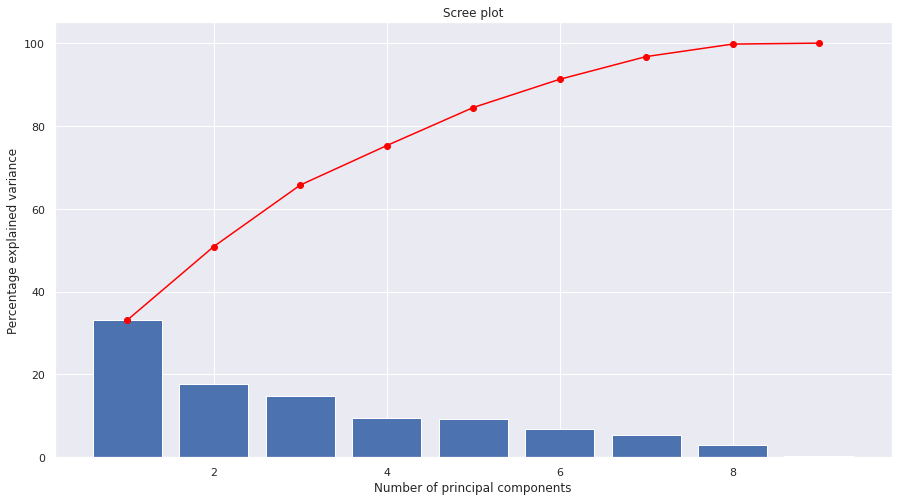

In [ ]:
display_scree_plot(pca) 

<b> Choisir 4 comme le nombre de composantes principaux parce qu'il presente presque 80% de information (basé sur la loi de Pareto)

## Analyser les 4 PCs

In [ ]:
# Les 4 pc
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]

In [ ]:
df_scaled.columns

Index(['Population', 'Disponibilité alimentaire', 'Disponibilité de protéines',
       'PIB par habitant', 'Importations', 'Exportations', 'Prix poulet',
       'Political_Stability', 'Distance km'],
      dtype='object')

In [ ]:
# Vérifier le pc1
pc1

array([-0.06304999,  0.47791958,  0.49876654,  0.44782854,  0.19228879,
        0.18587137,  0.27047665,  0.41647236,  0.01300477])

[Text(0, 0, 'Population'),
 Text(0, 0, 'Disponibilité alimentaire'),
 Text(0, 0, 'Disponibilité de protéines'),
 Text(0, 0, 'PIB par habitant'),
 Text(0, 0, 'Importations'),
 Text(0, 0, 'Exportations'),
 Text(0, 0, 'Prix poulet'),
 Text(0, 0, 'Political_Stability'),
 Text(0, 0, 'Distance km')]

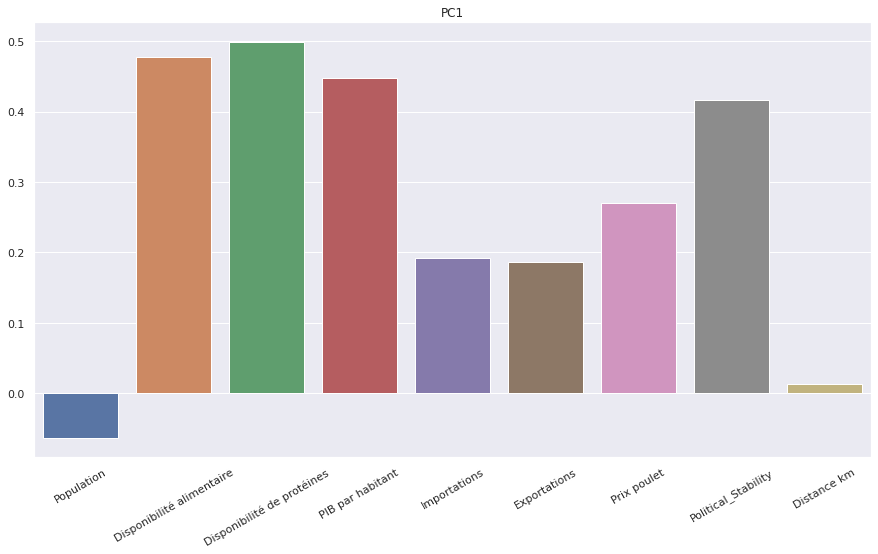

In [ ]:
# Vérifier les contributions des variables à pc1
plt.figure()
plt.title('PC1')
x = df_scaled.columns
y1 = pc1
ax1 = sns.barplot(x=x, y=y1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)

In [ ]:
# Vérifier le pc2
pc2

array([-0.2385357 , -0.35212677, -0.28308241,  0.33245711, -0.06594709,
       -0.26342345,  0.55463425,  0.15208536, -0.47323782])

[Text(0, 0, 'Population'),
 Text(0, 0, 'Disponibilité alimentaire'),
 Text(0, 0, 'Disponibilité de protéines'),
 Text(0, 0, 'PIB par habitant'),
 Text(0, 0, 'Importations'),
 Text(0, 0, 'Exportations'),
 Text(0, 0, 'Prix poulet'),
 Text(0, 0, 'Political_Stability'),
 Text(0, 0, 'Distance km')]

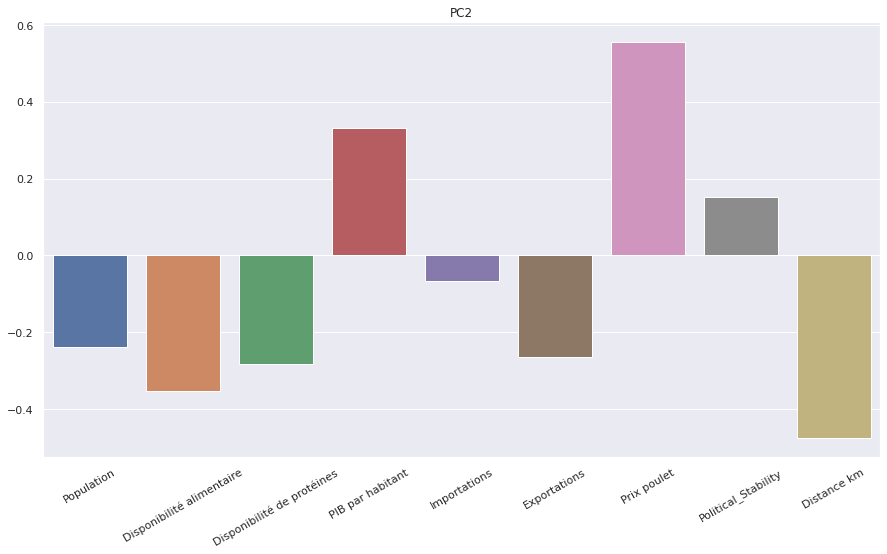

In [ ]:
# Vérifier les contributions des variables à pc2
plt.figure()
plt.title('PC2')
x = df_scaled.columns
y1 = pc2
ax1 = sns.barplot(x=x, y=y1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)

In [ ]:
# Vérifier le pc3
pc3

array([ 0.57472252, -0.15344478, -0.12488745,  0.16323996,  0.47127145,
        0.46914931,  0.01688731, -0.18975347, -0.35414002])

[Text(0, 0, 'Population'),
 Text(0, 0, 'Disponibilité alimentaire'),
 Text(0, 0, 'Disponibilité de protéines'),
 Text(0, 0, 'PIB par habitant'),
 Text(0, 0, 'Importations'),
 Text(0, 0, 'Exportations'),
 Text(0, 0, 'Prix poulet'),
 Text(0, 0, 'Political_Stability'),
 Text(0, 0, 'Distance km')]

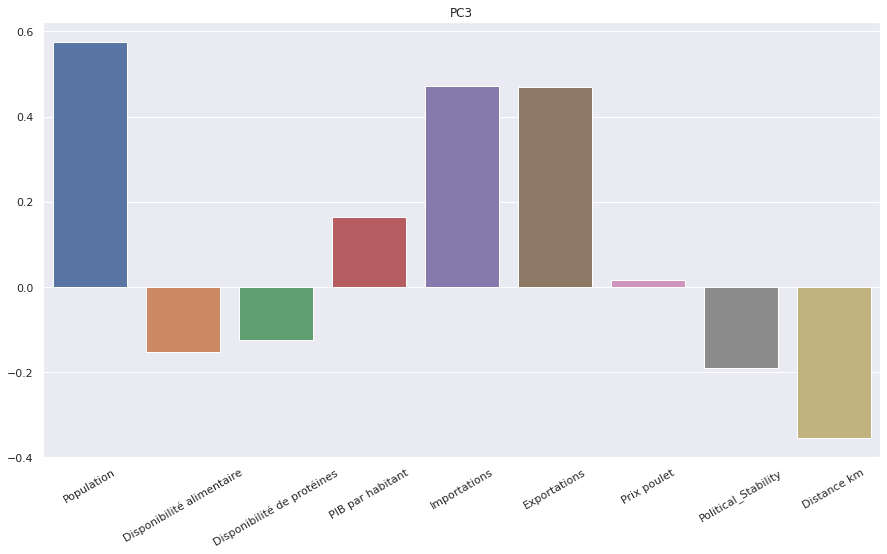

In [ ]:
# Vérifier les contributions des variables à pc3
plt.figure()
plt.title('PC3')
x = df_scaled.columns
y1 = pc3
ax1 = sns.barplot(x=x, y=y1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)

In [ ]:
# Vérifier le pc4
pc4

array([ 0.48455482, -0.15024063, -0.16855845,  0.08776849,  0.24339066,
       -0.42178996,  0.23523242,  0.25794378,  0.58949475])

[Text(0, 0, 'Population'),
 Text(0, 0, 'Disponibilité alimentaire'),
 Text(0, 0, 'Disponibilité de protéines'),
 Text(0, 0, 'PIB par habitant'),
 Text(0, 0, 'Importations'),
 Text(0, 0, 'Exportations'),
 Text(0, 0, 'Prix poulet'),
 Text(0, 0, 'Political_Stability'),
 Text(0, 0, 'Distance km')]

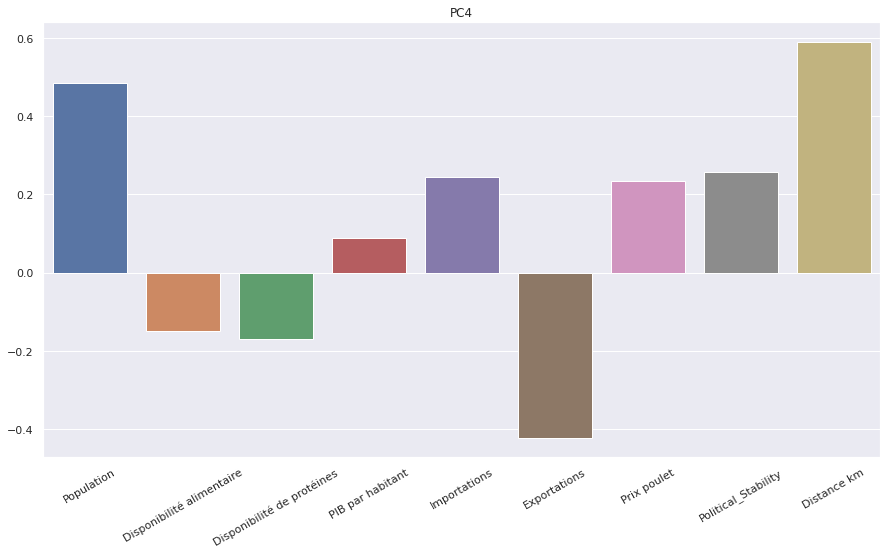

In [ ]:
# Vérifier les contributions des variables à pc4
plt.figure()
plt.title('PC4')
x = df_scaled.columns
y1 = pc4
ax1 = sns.barplot(x=x, y=y1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)

## Cercle de corrélation

In [ ]:
# La formule de Cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

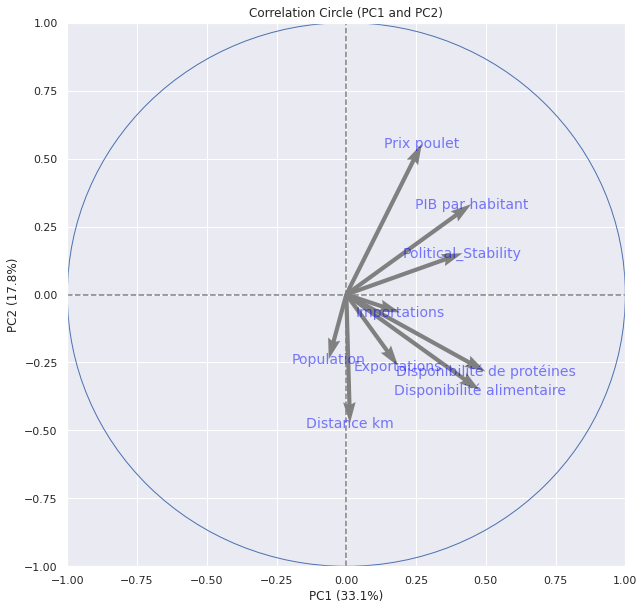

In [ ]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(df_scaled.columns),) 

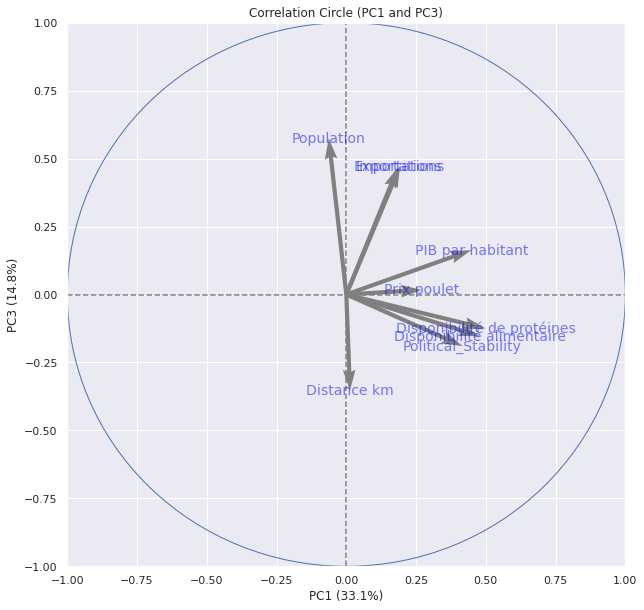

In [ ]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,2)], labels = np.array(df_scaled.columns),) 

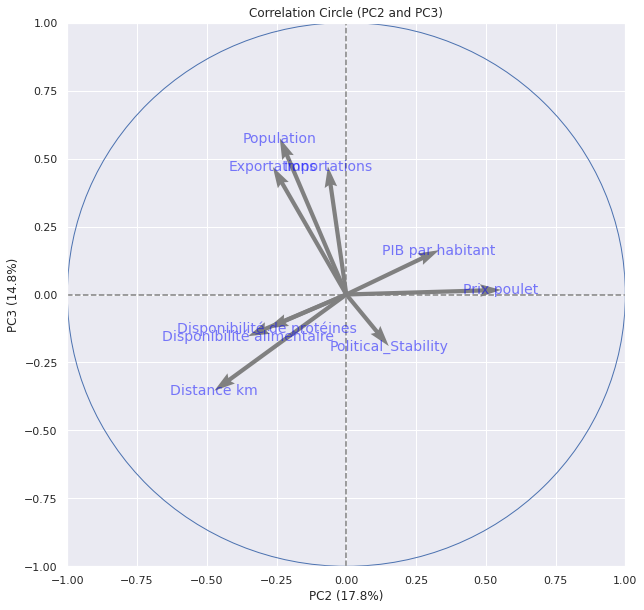

In [ ]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(df_scaled.columns),) 

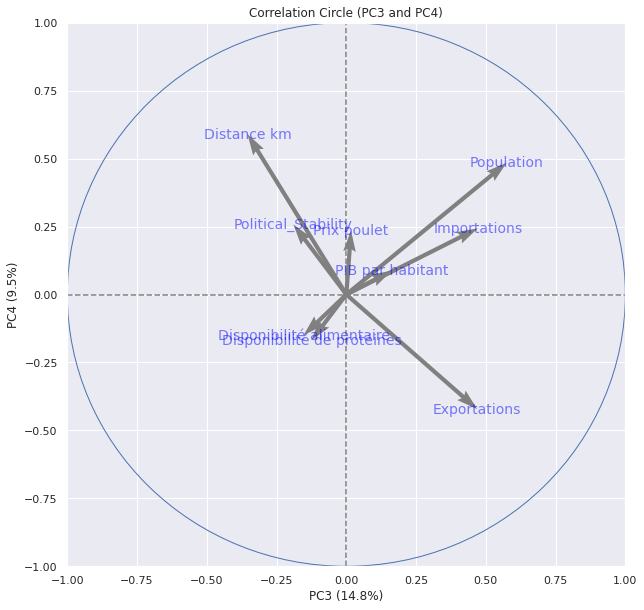

In [ ]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(2,3)], labels = np.array(df_scaled.columns),) 

## Interprétation de les 4 premier composants principaux

Choisir les PC1 et PC2, qui sont les 2 PC les plus importants et pertinentes

**Les variables les plus corrélées à F1 sont :**

<br>Disponibilité alimentaire
<br>Disponibilité de protéines
<br>PIB par habitant
<br>Stabilité politique

Elles sont corrélées positivement à F1, mais on a aussi la variable population qui est corrélée négativement à F1.

<br>**Les variables les plus corrélées à F2 sont :**

<br>Prix de poulet
<br>PIB par habitant
<br>Distance (avec une corrélation négative)
<br>Disponibilité alimentaire (avec une corrélation négative)

C’est évident qu'il y a de corrélation négative avec prix de poulet et  disponibilité alimentaire.

## Visualisation avec ACP

In [ ]:
# Transferer à 4 composants principaux
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_scaled)
print(pca.components_)

[[-0.06304999  0.47791958  0.49876654  0.44782854  0.19228879  0.18587137
   0.27047665  0.41647236  0.01300477]
 [-0.2385357  -0.35212677 -0.28308241  0.33245711 -0.06594709 -0.26342345
   0.55463425  0.15208536 -0.47323782]
 [ 0.57472252 -0.15344478 -0.12488745  0.16323996  0.47127145  0.46914931
   0.01688731 -0.18975347 -0.35414002]
 [ 0.48455482 -0.15024063 -0.16855845  0.08776849  0.24339066 -0.42178996
   0.23523242  0.25794378  0.58949475]]


In [ ]:
# Vérifier le shape
df_pca.shape

(171, 4)

In [ ]:
# Ajouter les résultats d'ACP dans df
df['pc1'] = df_pca[:,0]
df['pc2'] = df_pca[:,1]
df['pc3'] = df_pca[:,2]
df['pc4'] = df_pca[:,3]
df.head()

Population  Disponibilité alimentaire  \
Zone                                                         
Afghanistan           36296.113                        5.0   
Albania                2884.169                       85.0   
Algeria               41389.189                       22.0   
Angola                29816.766                       35.0   
Antigua and Barbuda      95.426                      233.0   

                     Disponibilité de protéines  PIB par habitant  \
Zone                                                                
Afghanistan                                0.54        520.616409   
Albania                                    6.26       4514.204908   
Algeria                                    1.97       4109.696001   
Angola                                     3.60       4095.811686   
Antigua and Barbuda                       17.77      15383.415188   

                     Importations  Exportations  Prix poulet  \
Zone                                                           
Afghanistan                  29.0           0.0     6.225301   
Albania                      38.0           0.0     4.570000   
Algeria                       2.0           0.0     3.690000   
Angola                      277.0           0.0     6.225301   
Antigua and Barbuda           7.0           0.0     6.225301   

                     Political_Stability  Distance km  cah_label  \
Zone                                                               
Afghanistan                        -2.80       5573.0          1   
Albania                             0.38       1546.0          3   
Algeria                            -0.92       2024.0          1   
Angola                             -0.33       6575.0          1   
Antigua and Barbuda                 0.75       6659.0          3   

                     cah_label_sk  kmeans_cluster3       pc1       pc2  \
Zone                                                                     
Afghanistan                     3                1 -2.852934  0.163802   
Albania                         1                0 -0.289224  0.205570   
Algeria                         3                1 -1.950195  0.239426   
Angola                          3                1 -0.823256  0.116967   
Antigua and Barbuda             1                2  2.512991 -1.240687   

                          pc3       pc4  
Zone                                     
Afghanistan          0.555998 -0.560468  
Albania             -0.154998 -0.885841  
Algeria              0.379483 -0.921382  
Angola               0.414847  0.481820  
Antigua and Barbuda -1.347509 -0.502444

Calculer les centroîds CAH

In [ ]:
# Créer le dataframe ACP
df_ACP = df.drop(['Population', 'Disponibilité alimentaire', 'Disponibilité de protéines', 'PIB par habitant',
                  'Importations', 'Exportations', 'Prix poulet', 'Political_Stability', 'Distance km'], axis = 1)
df_ACP.head()

cah_label  cah_label_sk  kmeans_cluster3       pc1  \
Zone                                                                      
Afghanistan                  1             3                1 -2.852934   
Albania                      3             1                0 -0.289224   
Algeria                      1             3                1 -1.950195   
Angola                       1             3                1 -0.823256   
Antigua and Barbuda          3             1                2  2.512991   

                          pc2       pc3       pc4  
Zone                                               
Afghanistan          0.163802  0.555998 -0.560468  
Albania              0.205570 -0.154998 -0.885841  
Algeria              0.239426  0.379483 -0.921382  
Angola               0.116967  0.414847  0.481820  
Antigua and Barbuda -1.240687 -1.347509 -0.502444

In [ ]:
# Calculer les centroîds CAH
df_centre_cah = df_ACP.groupby(['cah_label']).mean()
df_centre_cah = df_centre_cah[['pc1', 'pc2', 'pc3', 'pc4']]
df_centre_cah

pc1       pc2       pc3       pc4
cah_label                                        
1         -1.455391  0.226559  0.024704 -0.088515
2          1.107261 -3.210131  4.931456  0.481397
3          0.716490 -0.473334 -0.639243 -0.069040
4          2.480498  1.317365  1.053111  0.433901

### Visualisation pour CAH

#### 2D-CAH

Text(0, 0.5, 'Fourth Principal Component')

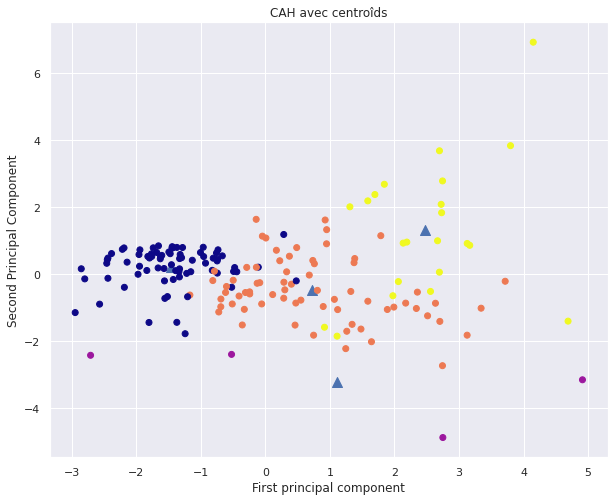

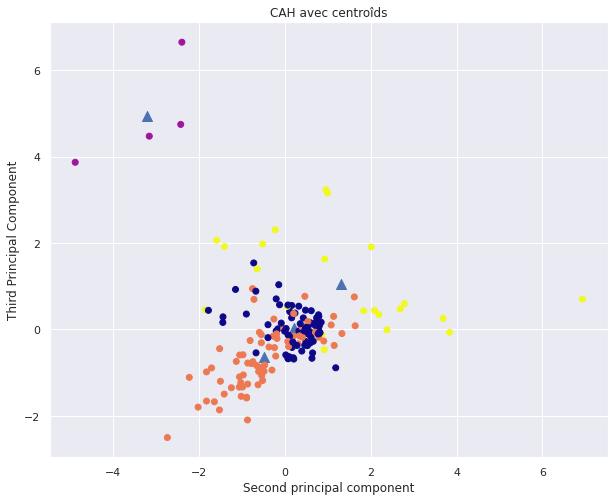

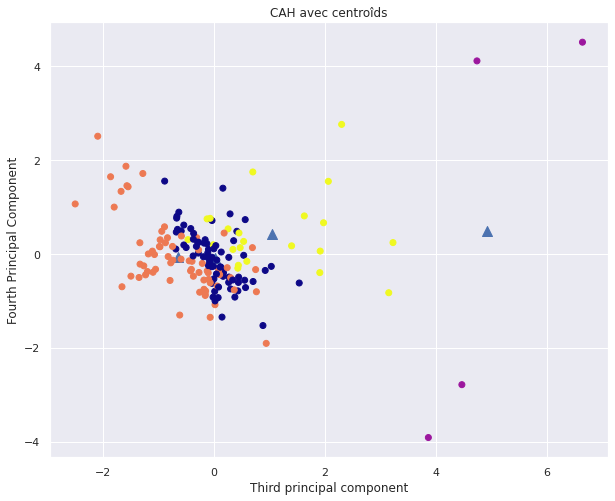

In [ ]:
# Créer graphique avec PC1 et PC2
plt.figure(figsize=(10,8))
plt.title('CAH avec centroîds')
plt.scatter(df_centre_cah['pc1'], df_centre_cah['pc2'], s = 100, marker = "^")
plt.scatter(df_pca[:,0],df_pca[:,1],cmap='plasma', c = cah_label)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Créer graphique avec PC2 et PC3
plt.figure(figsize=(10,8))
plt.title('CAH avec centroîds')
plt.scatter(df_centre_cah['pc2'], df_centre_cah['pc3'], s = 100, marker = "^")
plt.scatter(df_pca[:,1],df_pca[:,2],c = cah_label, cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

# Créer graphique avec PC3 et PC4
plt.figure(figsize=(10,8))
plt.title('CAH avec centroîds')
plt.scatter(df_centre_cah['pc3'], df_centre_cah['pc4'], s = 100, marker = "^")
plt.scatter(df_pca[:,2],df_pca[:,3],c = cah_label, cmap='plasma')
plt.xlabel('Third principal component')
plt.ylabel('Fourth Principal Component')

#### 3D-CAH

In [ ]:
# Créer graphique 3D avec PC1, PC2 et PC3
pcs = pd.DataFrame(list(zip(df_pca[:,0], df_pca[:,1], df_pca[:,2], cah_label)),columns =['f1', 'f2', 'f3', 'cah_label']) 
fig = px.scatter_3d(pcs, x='f1', y='f2', z='f3',color='cah_label')
fig.show()

#### CAH avec Geopandas

In [ ]:
# Importer les données geographique par Geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns= {'name': 'Zone'})
world.head()

pop_est      continent                      Zone iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [ ]:
world.Zone.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [ ]:
# Matching les noms
world = world.replace('Russia', 'Russian Federation')
world = world.replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
world = world.replace('Dominican Rep.', 'Dominican Republic')
world = world.replace('Bolivia', 'Bolivia (Plurinational State of)')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('South Korea', 'Republic of Korea')
world = world.replace('Macedonia', 'North Macedonia')
world = world.replace('China', 'China, mainland')
world = world.replace('Tanzania', 'United Republic of Tanzania')
world = world.replace('eSwatini', 'Eswatini')
world = world.replace('Iran', 'Iran (Islamic Republic of)')
world = world.replace('Vietnam', 'Viet Nam')
world = world.replace('Central African Rep.', 'Central African Republic')
world = world.replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
world = world.replace('Tanzania', 'United Republic of Tanzania')
world = world.replace('Venezuela', "Venezuela (Bolivarian Republic of)")
world = world.replace('eSwatini', 'Eswatini')
world = world.replace("Laos", "Lao People's Democratic Republic")
world = world.replace('Solomon Is.', 'Solomon Islands')
world = world.replace('eSwatini', 'Eswatini')
world

pop_est      continent                         Zone iso_a3  gdp_md_est  \
0       920938        Oceania                         Fiji    FJI      8374.0   
1     53950935         Africa  United Republic of Tanzania    TZA    150600.0   
2       603253         Africa                    W. Sahara    ESH       906.5   
3     35623680  North America                       Canada    CAN   1674000.0   
4    326625791  North America     United States of America    USA  18560000.0   
..         ...            ...                          ...    ...         ...   
172    7111024         Europe                       Serbia    SRB    101800.0   
173     642550         Europe                   Montenegro    MNE     10610.0   
174    1895250         Europe                       Kosovo    -99     18490.0   
175    1218208  North America          Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                     S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [ ]:
# La jointure de df et world
df_geo = pd.merge(world, df, on = 'Zone', how = 'inner')
df_geo = df_geo.drop(columns = ['pop_est'], axis = 1)
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   continent                   150 non-null    object  
 1   Zone                        150 non-null    object  
 2   iso_a3                      150 non-null    object  
 3   gdp_md_est                  150 non-null    float64 
 4   geometry                    150 non-null    geometry
 5   Population                  150 non-null    float64 
 6   Disponibilité alimentaire   150 non-null    float64 
 7   Disponibilité de protéines  150 non-null    float64 
 8   PIB par habitant            150 non-null    float64 
 9   Importations                150 non-null    float64 
 10  Exportations                150 non-null    float64 
 11  Prix poulet                 150 non-null    float64 
 12  Political_Stability         150 non-null    float64 
 13  Distance km 

On peut faire la visualisation avec 150 pays

In [ ]:
df_geo.Zone.unique()

array(['Fiji', 'United Republic of Tanzania', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Indonesia', 'Argentina', 'Chile', 'Kenya', 'Sudan', 'Chad',
       'Haiti', 'Dominican Republic', 'Russian Federation', 'Bahamas',
       'Norway', 'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico',
       'Uruguay', 'Brazil', 'Bolivia (Plurinational State of)', 'Peru',
       'Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras',
       'El Salvador', 'Guatemala', 'Belize',
       'Venezuela (Bolivarian Republic of)', 'Guyana', 'Suriname',
       'France', 'Ecuador', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana',
       'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger',
       'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso',
       'Central African Republic', 'Congo', 'Gabon', 'Zambia', 'Malawi',
       'Mozambique', 'Eswatini', 'Angola', 'Israel', 'Lebanon',
       'Madagascar',

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



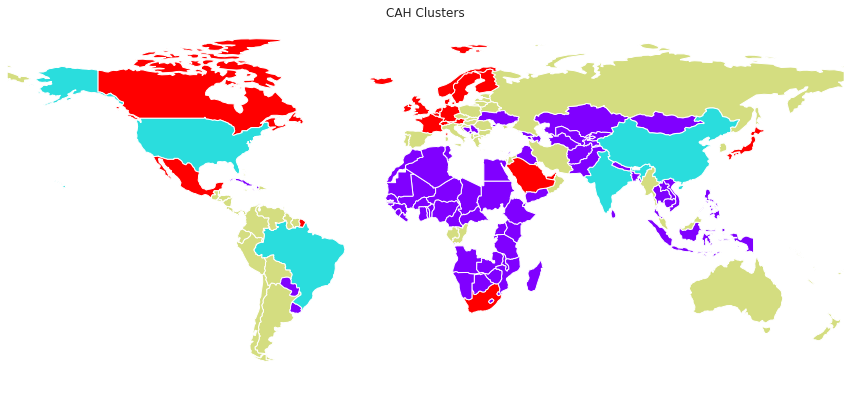

In [ ]:
# Le résultat CAH dans la carte du monde
geoplot.choropleth(
    df_geo, hue='cah_label', edgecolor='white', linewidth=1,
    cmap='rainbow', figsize=(15, 15))
plt.title('CAH Clusters')
plt.show()

### Visualisation pour Kmeans

Text(0, 0.5, 'Fourth Principal Component')

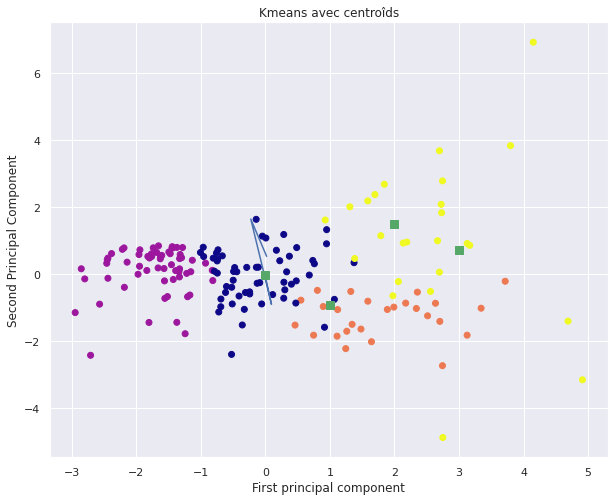

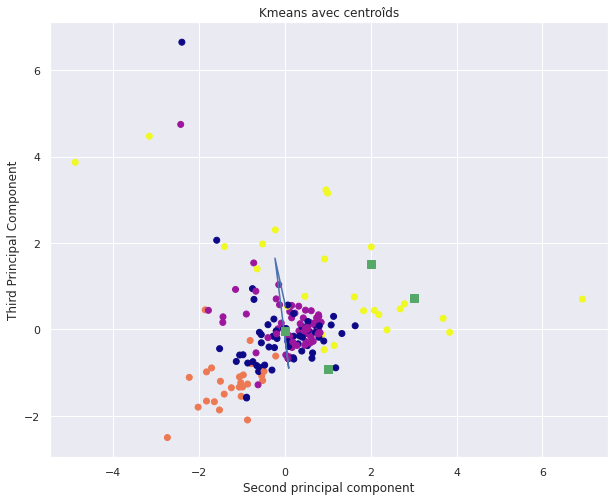

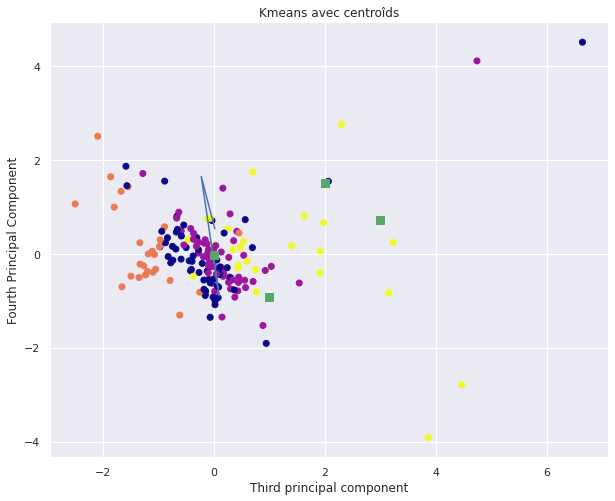

In [ ]:
# Créer graphique avec PC1 et PC2
plt.figure(figsize=(10,8))
plt.title('Kmeans avec centroîds')
plt.scatter(df_pca[:,0],df_pca[:,1],cmap='plasma', c = cluster_kmeans3)
plt.plot(kmeans_cluster3_centers[:,0], kmeans_cluster3_centers[:,1], kmeans_cluster3_centers[:,2], 'sg',markersize = 8)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Créer graphique avec PC2 et PC3
plt.figure(figsize=(10,8))
plt.title('Kmeans avec centroîds')
plt.scatter(df_pca[:,1],df_pca[:,2],c = cluster_kmeans3, cmap='plasma')
plt.plot(kmeans_cluster3_centers[:,0], kmeans_cluster3_centers[:,1], kmeans_cluster3_centers[:,2], 'sg',markersize = 8)
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

# Créer graphique avec PC3 et PC4
plt.figure(figsize=(10,8))
plt.title('Kmeans avec centroîds')
plt.scatter(df_pca[:,2],df_pca[:,3],c = cluster_kmeans3, cmap='plasma')
plt.plot(kmeans_cluster3_centers[:,0], kmeans_cluster3_centers[:,1], kmeans_cluster3_centers[:,2], 'sg',markersize = 8)
plt.xlabel('Third principal component')
plt.ylabel('Fourth Principal Component')

#### 3D-Kmeans

In [ ]:
pcs = pd.DataFrame(list(zip(df_pca[:,0], df_pca[:,1], df_pca[:,2], cluster_kmeans3)),columns =['f1', 'f2', 'f3', 'cluster_kmeans3']) 
fig = px.scatter_3d(pcs, x='f1', y='f2', z='f3',color='cluster_kmeans3')
fig.show()

#### Kmeans avec Geopandas

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



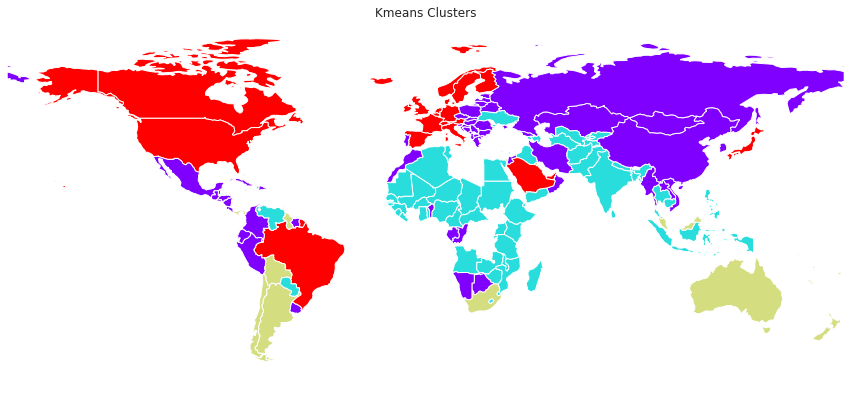

In [ ]:
# Le résultat Kmeans dans la carte du monde
geoplot.choropleth(
    df_geo, hue='kmeans_cluster3', edgecolor='white', linewidth=1,
    cmap='rainbow', figsize=(15, 15))
plt.title('Kmeans Clusters')
plt.show()

# Partie supplémentaire: Recalculer les clusters après ACP avec CAH et kmeans

## Récalculer les clusters après ACP avec CAH

In [ ]:
# Créer le dataframe ACP
df_ACP2 = df_ACP[['pc1', 'pc2', 'pc3', 'pc4']]
df_ACP2.head()

pc1       pc2       pc3       pc4
Zone                                                       
Afghanistan         -2.852934  0.163802  0.555998 -0.560468
Albania             -0.289224  0.205570 -0.154998 -0.885841
Algeria             -1.950195  0.239426  0.379483 -0.921382
Angola              -0.823256  0.116967  0.414847  0.481820
Antigua and Barbuda  2.512991 -1.240687 -1.347509 -0.502444

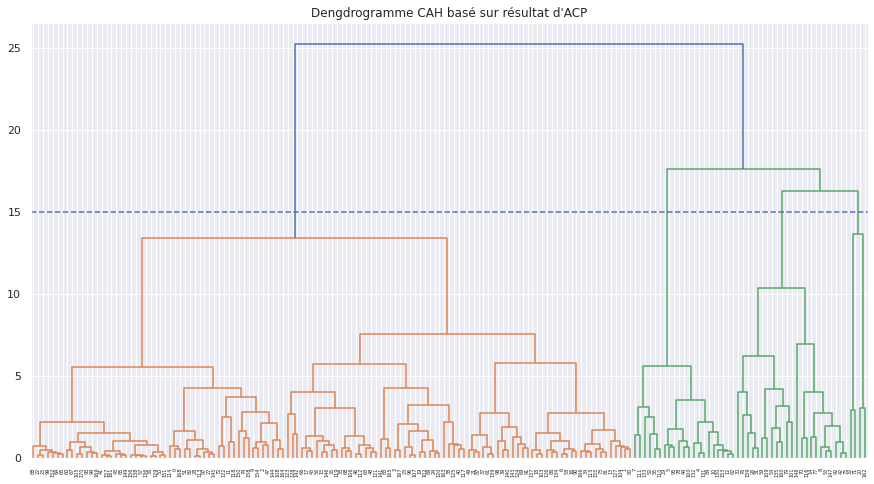

In [ ]:
# Labels pour 4 clusters par méthode CAH
cah_ward2 = linkage(df_ACP2, method = 'ward', metric='euclidean')
cah_label2 = fcluster(cah_ward2, 4, criterion='maxclust')
dn_ward2 = dendrogram (cah_ward2)
plt.axhline(linestyle='--', y=15) 
plt.title("Dengdrogramme CAH basé sur résultat d'ACP")
plt.show()

<b> Choisir 4 comme le nombre de clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Second Principal Component')

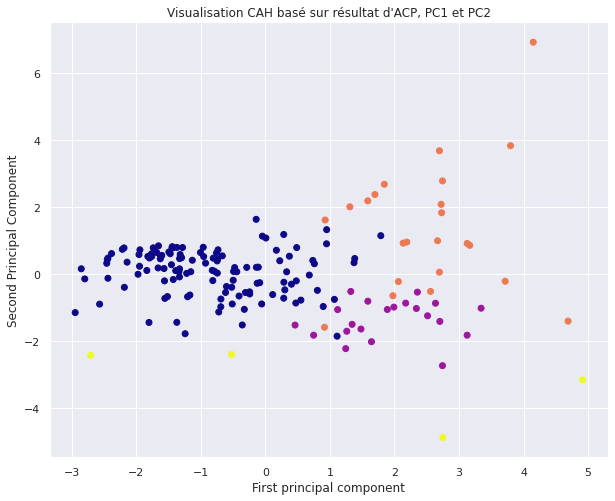

In [ ]:
df_ACP2['cah_label2'] = cah_label2

# Créer graphique avec PC1 et PC2
plt.figure(figsize=(10,8))
plt.title("Visualisation CAH basé sur résultat d'ACP, PC1 et PC2")
plt.scatter(df_ACP2['pc1'],df_ACP2['pc2'],cmap='plasma', c = cah_label2)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



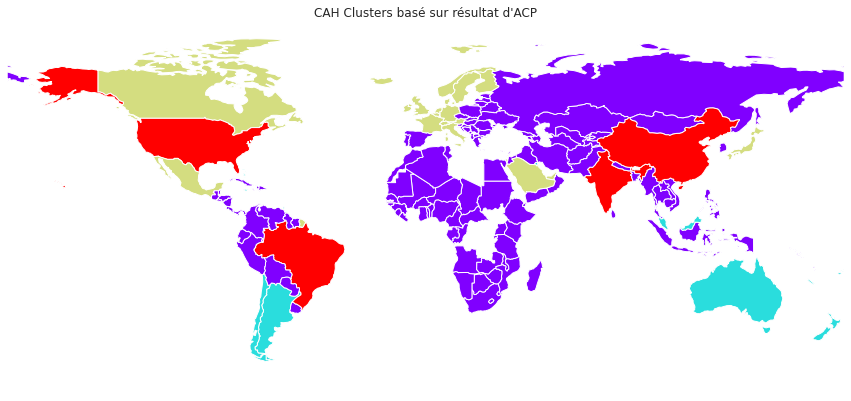

In [ ]:
# La jointure de df_ACP2 et world
df_geo2 = pd.merge(world, df_ACP2, on = 'Zone', how = 'inner')
df_geo2 = df_geo2.drop(columns = ['pop_est'], axis = 1)

# Le résultat CAH dans la carte du monde
geoplot.choropleth(
    df_geo2, hue='cah_label2', edgecolor='white', linewidth=1,
    cmap='rainbow', figsize=(15, 15))
plt.title("CAH Clusters basé sur résultat d'ACP")
plt.show()

## Récalculer les clusters après ACP avec kmeans

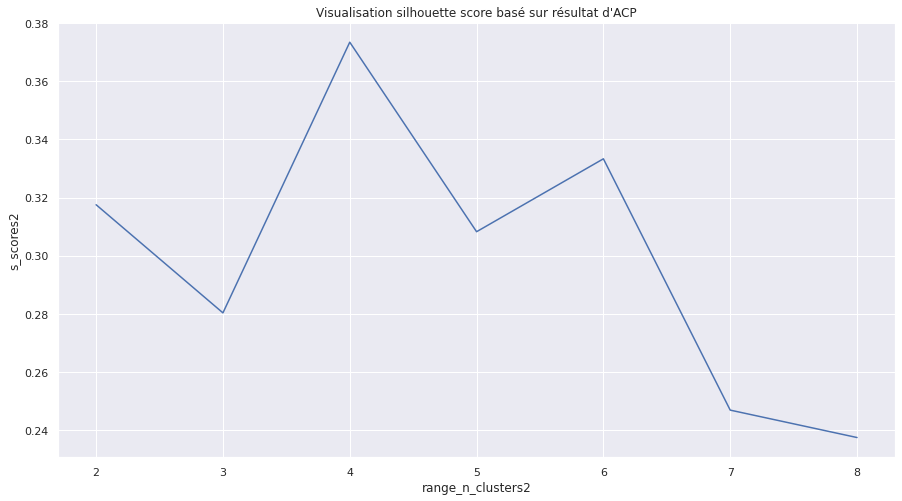

In [ ]:
# Nombre de cluster
s_scores2 = []
range_n_clusters2 = [2, 3, 4, 5, 6, 7, 8]

# Calculer silhouette score avec kmeans
for num_clusters2 in range_n_clusters2:
    
    kmeans_sk2 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans_sk2.fit(df_ACP2)
    s_scores2.append (silhouette_score(df_ACP2, kmeans_sk.labels_))
df_score2 = pd.DataFrame({'range_n_clusters2': range_n_clusters,
             's_scores2': s_scores})

sns.lineplot(x= 'range_n_clusters2', y = 's_scores2', data = df_score2)
plt.title("Visualisation silhouette score basé sur résultat d'ACP")
plt.show()

**Choisir 4 comme le nombre de clusters**

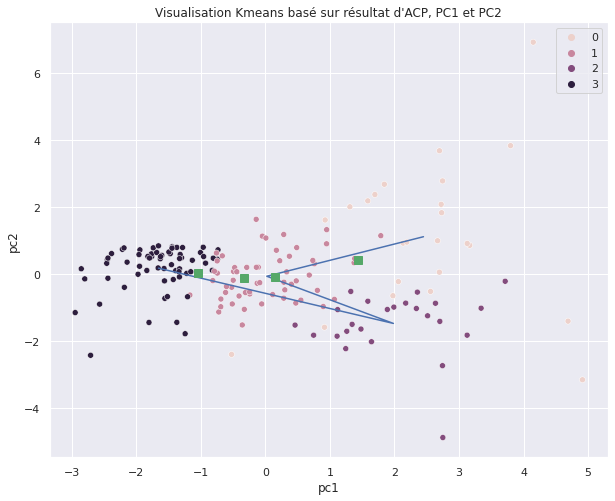

In [ ]:
# Marquer les centroids
kmeans_cluster_centers2, _ = kmeans(df_ACP2, 4)
cluster_kmeans2, _ = vq(df_ACP2, kmeans_cluster_centers2)

# Présenter les centroids et les clusters avec 'pc1' et 'pc2'
plt.figure(figsize=(10,8))
sns.scatterplot( x = 'pc1', y = 'pc2', hue = cluster_kmeans2, data = df_ACP2)
plt.plot(kmeans_cluster_centers2[:,0], kmeans_cluster_centers2[:,1], kmeans_cluster_centers2[:,2], kmeans_cluster_centers2[:,3], 'sg',markersize = 8)
plt.title("Visualisation Kmeans basé sur résultat d'ACP, PC1 et PC2")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



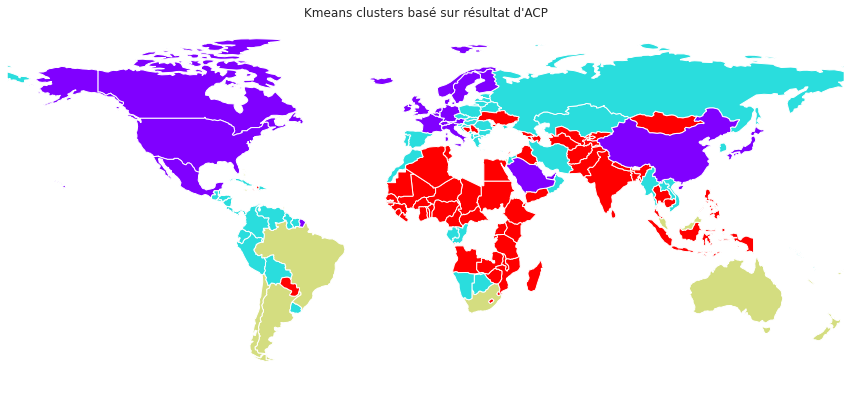

In [ ]:
# Mettre à jour de df_ACP2 et world
df_ACP2['cluster_kmeans2'] = cluster_kmeans2

df_geo2 = pd.merge(world, df_ACP2, on = 'Zone', how = 'inner')
df_geo2 = df_geo2.drop(columns = ['pop_est'], axis = 1)

# Le résultat Kmeans dans la carte du monde
geoplot.choropleth(
    df_geo2, hue='cluster_kmeans2', edgecolor='white', linewidth=1,
    cmap='rainbow', figsize=(15, 15))
plt.title("Kmeans clusters basé sur résultat d'ACP")
plt.show()

# Heatmap

## Heatmap avec clusters

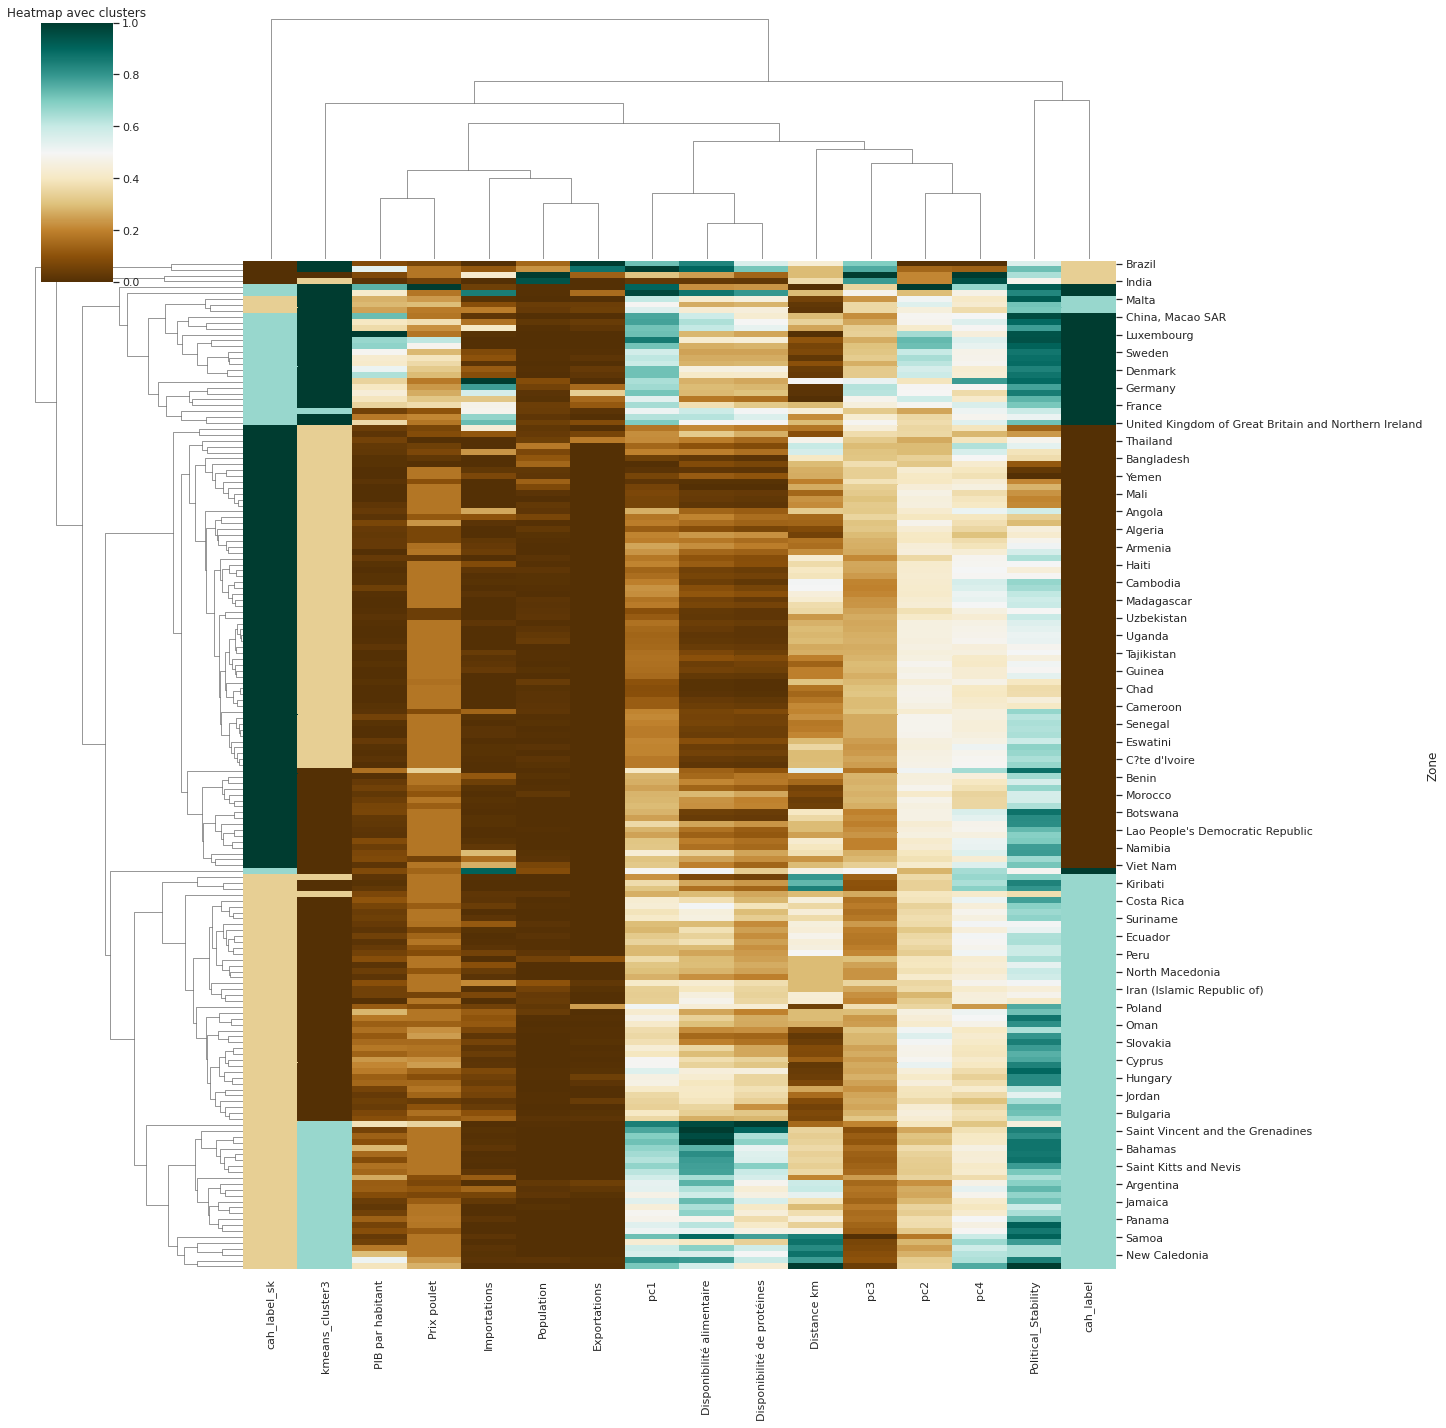

In [ ]:
# Créer heatmap avec df original avec clusters
sns.clustermap(df, figsize = (20,20), standard_scale = 1, cmap='BrBG')
plt.title('Heatmap avec clusters')

## Triangle Correlation Heatmap avec clusters

Text(0.5, 1.0, 'Triangle Correlation Heatmap avec clusters')

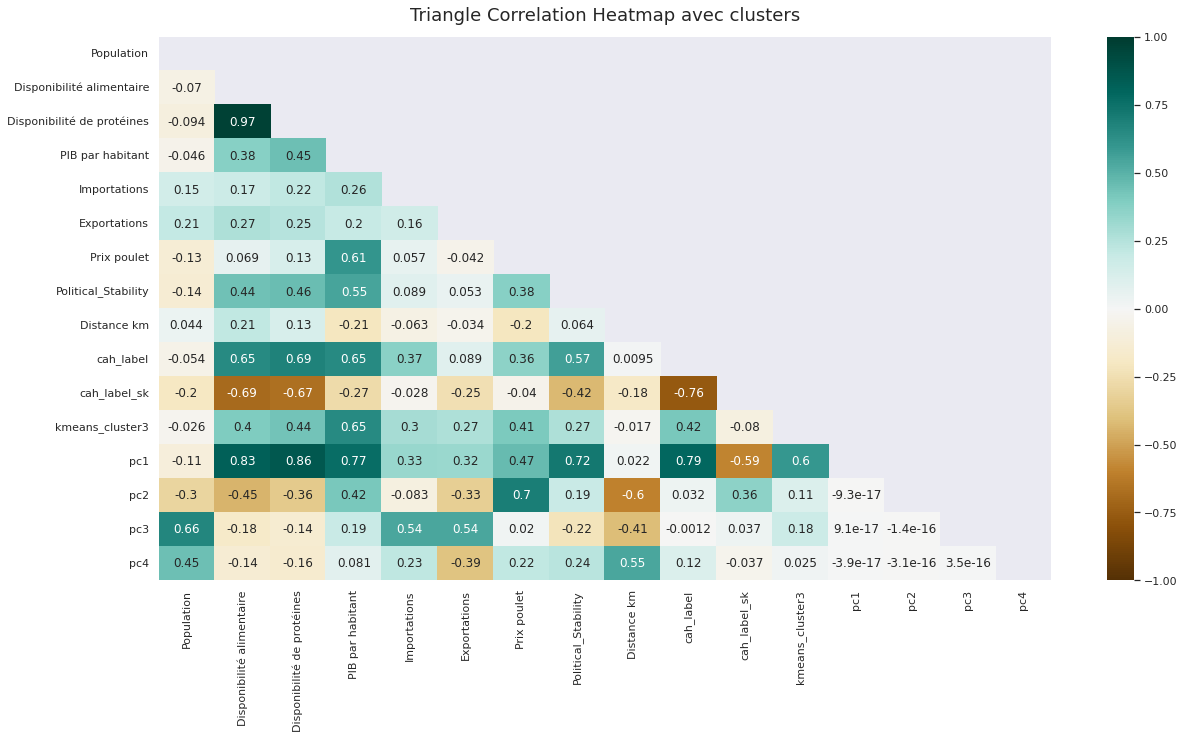

In [ ]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap avec clusters', fontdict={'fontsize':18}, pad=16)

## Triangle Correlation Heatmap avec ACP

Text(0.5, 1.0, 'Triangle Correlation Heatmap avec ACP')

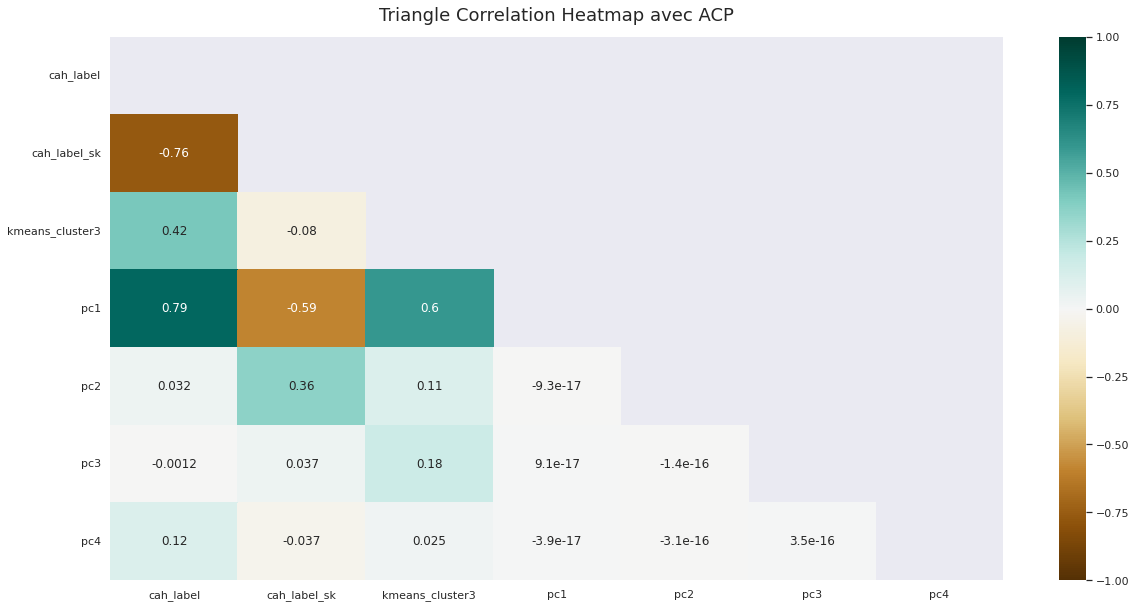

In [ ]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_ACP.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df_ACP.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap avec ACP', fontdict={'fontsize':18}, pad=16)

# Teste statistique

### Teste loi normalité

#### Q-Q plot

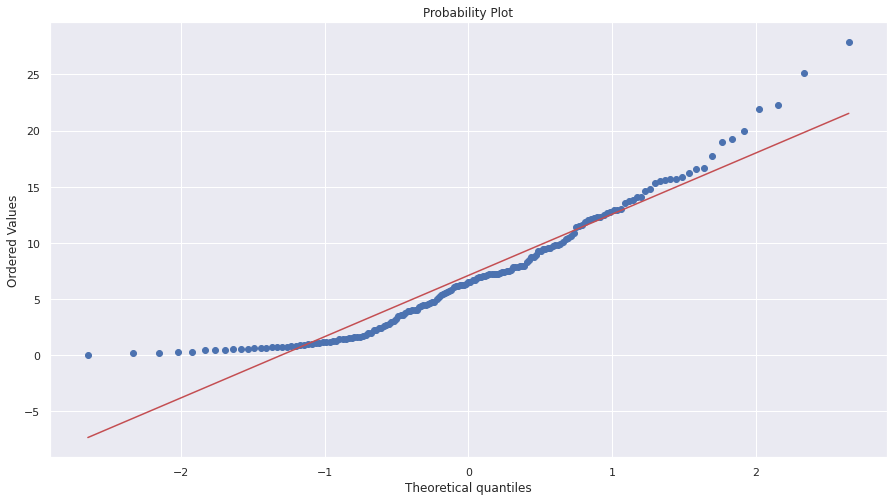

In [ ]:
stats.probplot(df['Disponibilité de protéines'], dist="norm", plot=pylab)
pylab.show()

#### Shapiro-Wilk Test

In [ ]:
# Teste loi normalité
stat_shapiro, p_shapiro = stats.shapiro(df['Disponibilité de protéines'])
print('Statistics=%.3f, p=%.3f' % (stat_shapiro, p_shapiro))
# Interpréter résultats
alpha = 0.05
if p_shapiro > alpha:
    print("L'hypothèse de normalité est donc tolérée (accepte H0)")
else:
    print("L'hypothèse de normalité est donc rejetée (rejete H0)")

Statistics=0.923, p=0.000
L'hypothèse de normalité est donc rejetée (rejete H0)


### Teste homoscédasticité - Teste levene pour disponibilité de protéines

<font color = Indigo> **Question: Les disponibilités de protéines sont-ils toujour pareils entre les classes differents ?** </font>
1. H0: Les disponibilités de protéines sont **pareils** entre les classes differents.
2. HA: Les disponibilités de protéines sont **differents** entre les classes differents.

In [ ]:
# grouper les samples
group_km0 = df[df['kmeans_cluster3'] == 0]['Disponibilité de protéines']
group_km1 = df[df['kmeans_cluster3'] == 1]['Disponibilité de protéines']
group_km2 = df[df['kmeans_cluster3'] == 2]['Disponibilité de protéines']
group_km3 = df[df['kmeans_cluster3'] == 3]['Disponibilité de protéines']

# calculer le p-value
F_group_km, p_value_group_km = stats.levene(group_km0, group_km1, group_km2, group_km3)

In [ ]:
print('Statistics=%.3f, p=%.3f' % (F_group_km, p_value_group_km))
print("*P-value < 0.05, on rejette H0 et accept " + 
       "HA: Les disponibilités de protéines sont differents entre les classes differents. " +
       "\nIl y a une corrélation entre les disponibilité de protéines et les clusters.")

Statistics=11.153, p=0.000
*P-value < 0.05, on rejette H0 et accept HA: Les disponibilités de protéines sont differents entre les classes differents. 
Il y a une corrélation entre les disponibilité de protéines et les clusters.


### Teste levene pour disponibilité alimentaire



<font color = Indigo> **Levene test for equal variances:** </font>

<font color = Indigo> **Question: Les disponibilité alimentaire sont-ils toujour pareils entre les classes differents ?** </font>
1. H0: Les disponibilité alimentaire sont **pareils** entre les classes differents.
2. HA: Les disponibilité alimentaire sont **differents** entre les classes differents.

In [ ]:
# grouper les samples
group_cah1 = df[df['cah_label'] == 1]['Disponibilité alimentaire']
group_cah2 = df[df['cah_label'] == 2]['Disponibilité alimentaire']
group_cah3 = df[df['cah_label'] == 3]['Disponibilité alimentaire']
group_cah4 = df[df['cah_label'] == 4]['Disponibilité alimentaire']

# calculer le p-value
stat_cah, p_value_cah = stats.levene(group_cah1, group_cah2, group_cah3, group_cah4)

print('Statistics=%.3f, p=%.3f' % (stat_cah, p_value_cah))
print ("*P-value < 0.05, on rejette H0 et accept " + 
       "HA: Les Disponibilité alimentaire sont differents entre les classes differents. " +
       "\nIl y a une corrélation entre les disponibilité alimentaire et les classes.")

Statistics=17.001, p=0.000
*P-value < 0.05, on rejette H0 et accept HA: Les Disponibilité alimentaire sont differents entre les classes differents. 
Il y a une corrélation entre les disponibilité alimentaire et les classes.


# Recommandations

**Recommandations sans tenir compte d'autres facteurs, pour choisir marchés nombreux (22 pays)**

**Groupe 4 de CAH:**
<br> Les pays/région riches
Ils sont les pays riches, bien développés avec PIB par habitant les plus hautes, les prix de poulet les plus haute. Ils sont les pays/regions les plus proches avec stabilité politique stable.

<br> Austria, Belgium, Canada, China, Hong Kong SAR, China, Macao SAR, Denmark, Finland, France, Germany, Iceland, Ireland, Japan, Luxembourg, Mexico, Netherlands, Norway, Saudi Arabia, South Africa, Sweden, Switzerland, United Arab Emirates, United Kingdom of Great Britain and Northern Ireland.

**Recommandations prioritaires (7 pays):**

1. Pas de longue distance
<br> Pour les produits comme poulet, on pense que la distance est très important parce que les poulets ne sont plus consommables après leur date de péremption. De plus, il a besoin de services d'entreposage congelé très avancé pour longues distances qui coûte cher pour les producteurs et les consommateurs. En résultat, on ne recommande pas les pays/régions avec longues distances.

2. Beaucoup d'importation
<br> Ça veut dire que les besoins sont beaucoup.

3. Bon prix -- "pays riche"

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



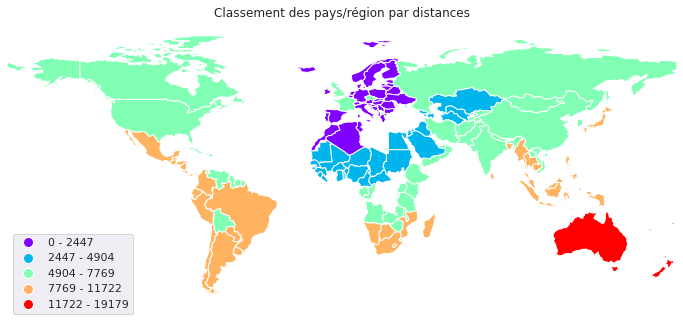

In [ ]:
# Vérifier la classification de distance
geoplot.choropleth(
    df_geo, hue='Distance km', edgecolor='white', linewidth=1,
    cmap='rainbow', legend=True, scheme='FisherJenks', figsize=(12, 15)
)
plt.title("Classement des pays/région par distances")
plt.show()

**Sélectionner les pays avec distances moins de 7769 kms pour choisir les 3 premiers classes**

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



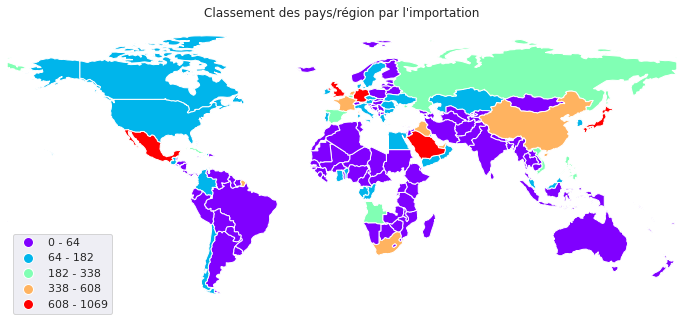

In [ ]:
# Vérifier la classification d'importation
geoplot.choropleth(
    df_geo, hue='Importations', edgecolor='white', linewidth=1,
    cmap='rainbow', legend=True, scheme='FisherJenks', figsize=(12, 15)
)
plt.title("Classement des pays/région par l'importation")
plt.show()

**Sélectionner les pays avec importation plus 182 Milliers de tonnes pour choisir les 3 derniers classes**

In [ ]:
# Ajouter le filtre pour cluster n.4 de CAH
df_geo_reco1 = df_geo.loc[df_geo.cah_label == 4,:] 

# Ajouter le filtre pour importation
df_geo_reco2 = df_geo_reco1.loc[df_geo_reco1['Importations'] >=182, :]

# Ajouter le filtre pour distance
df_geo_reco3 = df_geo_reco2.loc[df_geo_reco1['Distance km']<7769, :]

# Sauf France
df_geo_reco = df_geo_reco3.loc[df_geo_reco1['Zone']!='France', :]
df_geo_reco = df_geo_reco.reset_index()

# Les recommandations
df_geo_reco

index      continent                                               Zone  \
0      2  North America                                             Canada   
1     72           Asia                               United Arab Emirates   
2    104         Europe                                            Germany   
3    111         Europe                                            Belgium   
4    112         Europe                                        Netherlands   
5    124         Europe  United Kingdom of Great Britain and Northern I...   
6    137           Asia                                       Saudi Arabia   

  iso_a3  gdp_md_est                                           geometry  \
0    CAN   1674000.0  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
1    ARE    667200.0  POLYGON ((51.57952 24.24550, 51.75744 24.29407...   
2    DEU   3979000.0  POLYGON ((14.11969 53.75703, 14.35332 53.24817...   
3    BEL    508600.0  POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...   
4    NLD    870800.0  POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...   
5    GBR   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
6    SAU   1731000.0  POLYGON ((34.95604 29.35655, 36.06894 29.19749...   

   Population  Disponibilité alimentaire  Disponibilité de protéines  \
0   36732.095                      154.0                       13.86   
1    9487.203                      147.0                       14.80   
2   82658.409                       71.0                        7.96   
3   11419.748                       44.0                        4.57   
4   17021.347                       70.0                        8.48   
5   66727.461                      120.0                       13.77   
6   33101.179                      151.0                       15.57   

   PIB par habitant  ...  Prix poulet  Political_Stability  Distance km  \
0      44906.748920  ...    10.930000                 1.10  6841.000000   
1      40644.804043  ...     7.390000                 0.62  5234.000000   
2      44651.829102  ...     7.610000                 0.59   816.000000   
3      44025.903247  ...     9.460000                 0.43   504.000000   
4      48989.638816  ...     8.330000                 0.92   693.000000   
5      40448.365256  ...     6.225301                 0.33  5931.802721   
6      20802.464299  ...     7.010000                -0.58  4546.000000   

   cah_label  cah_label_sk  kmeans_cluster3       pc1       pc2       pc3  \
0          4             2                3  3.166300  0.864313 -0.121487   
1          4             2                3  2.696023  0.062332  0.536960   
2          4             2                3  2.190921  0.960934  3.229470   
3          4             2                3  1.309152  2.014344  1.910535   
4          4             2                3  2.667509  1.000214  3.153223   
5          4             2                3  2.558315 -0.512724  1.978040   
6          4             2                3  1.975678 -0.641450  1.401747   

        pc4  
0  0.746216  
1  0.266299  
2  0.241023  
3 -0.399034  
4 -0.828106  
5  0.663911  
6  0.171791  

[7 rows x 22 columns]

In [ ]:
# Les recommandations prioritaires (7 pays):
df_geo_reco.Zone

0                                               Canada
1                                 United Arab Emirates
2                                              Germany
3                                              Belgium
4                                          Netherlands
5    United Kingdom of Great Britain and Northern I...
6                                         Saudi Arabia
Name: Zone, dtype: object

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



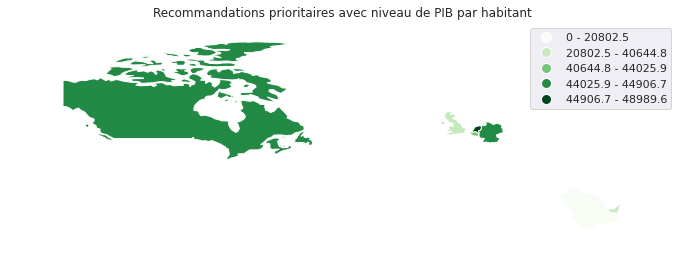

In [ ]:
geoplot.choropleth(
    df_geo_reco, hue='PIB par habitant', edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, scheme='FisherJenks', figsize=(12, 15))

plt.title('Recommandations prioritaires avec niveau de PIB par habitant')
plt.show()